In [59]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import  itertools

sns.set_theme(style='ticks', font_scale=2.0, rc={'text.usetex': True})

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'

In [60]:
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Load JSON data
with open("../code/macOS/btree/bench_over_n.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']

# Convert to DataFrame
btree_d = pd.DataFrame(benchmarks)

# Drop rows where 'name' contains 'OrderedMap' and create an explicit copy
btree_df = btree_d.loc[~btree_d['name'].str.contains("OrderedMap", na=False)].copy()

# Convert time to milliseconds using .loc
btree_df.loc[:, 'real_time_ms'] = btree_df['real_time'] / 1e6
btree_df.loc[:, 'cpu_time_ms'] = btree_df['cpu_time'] / 1e6

# Convert RAM and Page to integers and sum them; store back into 'RAM'
btree_df.loc[:, 'RAM'] = btree_df['RAM'].astype(int) + btree_df['Page'].astype(int)

# Extract 'b' value from the 'name' column using .loc
btree_df.loc[:, 'b'] = pd.to_numeric(btree_df['name'].str.extract(r'<(\d+)>')[0])

# Normalize cpu_time_ms, RAM, and Page
btree_df[['cpu_time_ms_norm', 'RAM_norm', 'Page_norm']] = scaler.fit_transform(
    btree_df[['cpu_time_ms', 'RAM', 'Page']]
)

# Calculate operations per nanosecond correctly
btree_df.loc[:, 'ops/ns'] = 20 / btree_df['cpu_time']

# Display the DataFrame
print(btree_df)


                            name  family_index  per_family_instance_index  \
23       BTreeMap_Insertion<2>/8             1                          0   
24      BTreeMap_Insertion<2>/16             1                          1   
25      BTreeMap_Insertion<2>/32             1                          2   
26      BTreeMap_Insertion<2>/64             1                          3   
27     BTreeMap_Insertion<2>/128             1                          4   
..                           ...           ...                        ...   
225   BTreeMap_Search<6>/2097152             9                         18   
226   BTreeMap_Search<6>/4194304             9                         19   
227   BTreeMap_Search<6>/8388608             9                         20   
228  BTreeMap_Search<6>/16777216             9                         21   
229  BTreeMap_Search<6>/33554432             9                         22   

                        run_name   run_type  repetitions  repetition_index 

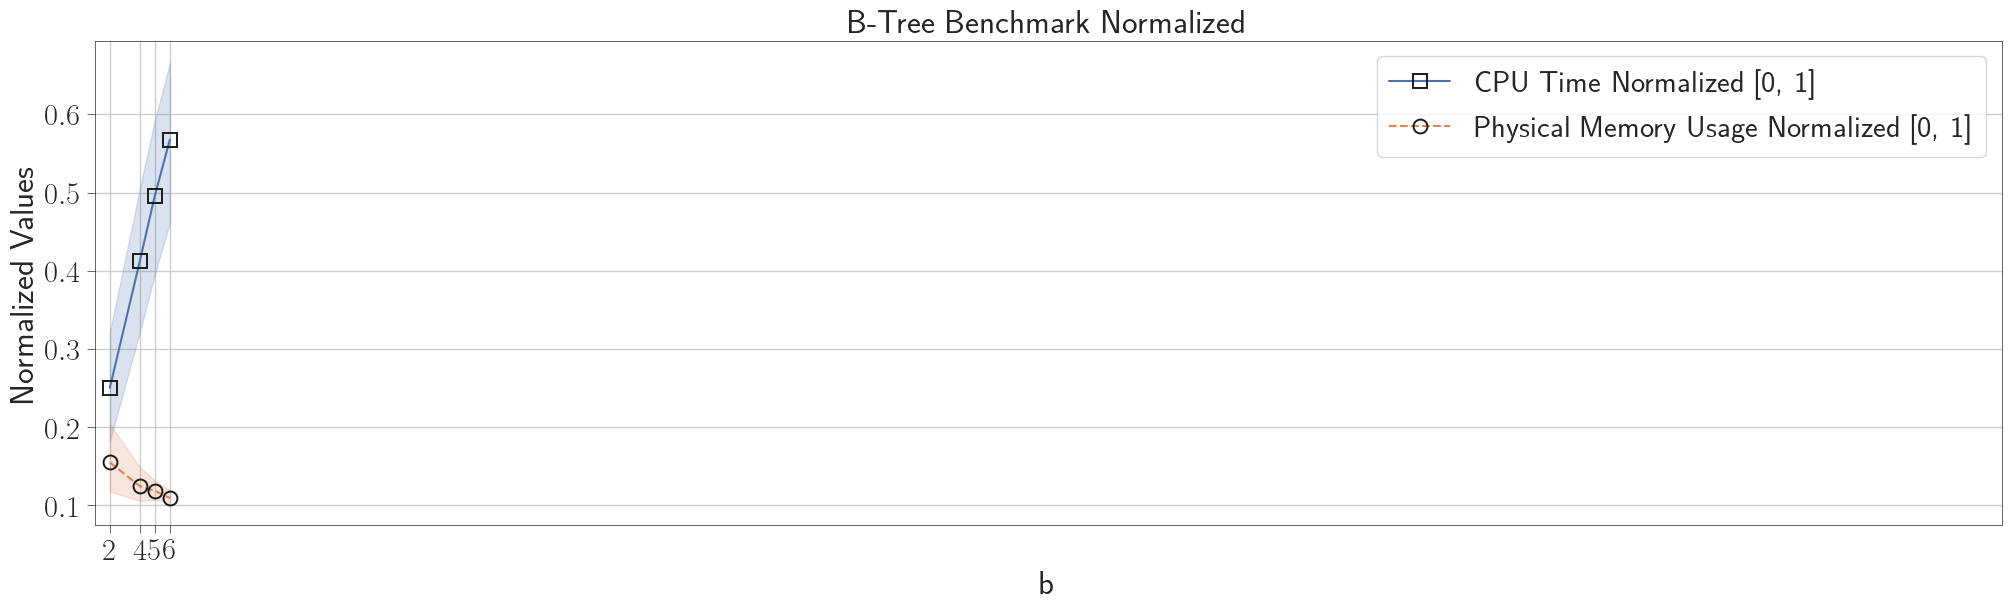

name  family_index  per_family_instance_index  \
23       BTreeMap_Insertion<2>/8             1                          0   
24      BTreeMap_Insertion<2>/16             1                          1   
25      BTreeMap_Insertion<2>/32             1                          2   
26      BTreeMap_Insertion<2>/64             1                          3   
27     BTreeMap_Insertion<2>/128             1                          4   
..                           ...           ...                        ...   
225   BTreeMap_Search<6>/2097152             9                         18   
226   BTreeMap_Search<6>/4194304             9                         19   
227   BTreeMap_Search<6>/8388608             9                         20   
228  BTreeMap_Search<6>/16777216             9                         21   
229  BTreeMap_Search<6>/33554432             9                         22   

                        run_name   run_type  repetitions  repetition_index  \
23       BTreeMap_Insertion<2>/8  iteration            1                 0   
24      BTreeMap_Insertion<2>/16  iteration            1                 0   
25      BTreeMap_Insertion<2>/32  iteration            1                 0   
26      BTreeMap_Insertion<2>/64  iteration            1                 0   
27     BTreeMap_Insertion<2>/128  iteration            1                 0   
..                           ...        ...          ...               ...   
225   BTreeMap_Search<6>/2097152  iteration            1                 0   
226   BTreeMap_Search<6>/4194304  iteration            1                 0   
227   BTreeMap_Search<6>/8388608  iteration            1                 0   
228  BTreeMap_Search<6>/16777216  iteration            1                 0   
229  BTreeMap_Search<6>/33554432  iteration            1                 0   

     threads  iterations     real_time  ...  time_unit      Page      RAM  \
23         1           1  2.837406e+14  ...         ns       0.0      0.0   
24         1           1  2.837406e+14  ...         ns       0.0      0.0   
25         1           1  2.837406e+14  ...         ns       0.0      0.0   
26         1           1  2.837406e+14  ...         ns       0.0      0.0   
27         1           1  2.837406e+14  ...         ns       0.0      0.0   
..       ...         ...           ...  ...        ...       ...      ...   
225        1           1  2.841936e+14  ...         ns   30720.0  45984.0   
226        1           1  2.841952e+14  ...         ns   60416.0    800.0   
227        1           1  2.841994e+14  ...         ns  120832.0 -51872.0   
228        1           1  2.842086e+14  ...         ns  242688.0 -24352.0   
229        1           1  2.842357e+14  ...         ns  485376.0 -40480.0   

     real_time_ms  cpu_time_ms  b  cpu_time_ms_norm  RAM_norm  Page_norm  \
23   2.837406e+08    61662.425  2      0.000000e+00  0.103174   0.000000   
24   2.837406e+08    61662.467  2      8.489878e-08  0.103174   0.000000   
25   2.837406e+08    61662.504  2      1.596906e-07  0.103174   0.000000   
26   2.837406e+08    61662.534  2      2.203326e-07  0.103174   0.000000   
27   2.837406e+08    61662.567  2      2.870387e-07  0.103174   0.000000   
..            ...          ... ..               ...       ...        ...   
225  2.841936e+08   514369.491  6      9.151019e-01  0.117331   0.021095   
226  2.841952e+08   515963.827  6      9.183246e-01  0.103420   0.041487   
227  2.841994e+08   520070.890  6      9.266267e-01  0.087205   0.082974   
228  2.842086e+08   529388.624  6      9.454615e-01  0.095677   0.166652   
229  2.842357e+08   556369.176  6      1.000000e+00  0.090712   0.333304   

           ops/ns  
23   3.243466e-10  
24   3.243464e-10  
25   3.243462e-10  
26   3.243461e-10  
27   3.243459e-10  
..            ...  
225  3.888255e-11  
226  3.876241e-11  
227  3.845630e-11  
228  3.777943e-11  
229  3.594735e-11  

[184 rows x 21 columns]

In [61]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axis with constrained layout enabled
fig, ax = plt.subplots(figsize=(20, 6), constrained_layout=True)

# Plot CPU time normalized
sns.lineplot(
    data=btree_df,
    x='b',
    y='cpu_time_ms_norm',
    marker='s',
    markerfacecolor='none',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    linestyle='-',  # Ensure line visibility
    linewidth=1.5,
    label='CPU Time Normalized [0, 1]',
    ax=ax
)

# Plot RAM usage normalized
sns.lineplot(
    data=btree_df,
    x='b',
    y='RAM_norm',
    marker='o',
    markerfacecolor='none',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    linestyle='--',
    linewidth=1.5,
    label='Physical Memory Usage Normalized [0, 1]',
    ax=ax
)

# Set labels and title
ax.set_title("B-Tree Benchmark Normalized")
ax.set_xlabel('b')
ax.set_ylabel('Normalized Values')

# Set grid and legend
ax.grid(True)
ax.legend()

# Adjust tick parameters
ax.tick_params(width=0.5)

# Adjust spines
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# Ensure unique and sorted xticks
plt.xticks(sorted(btree_df['b'].unique()))

# Set x-axis limits
plt.xlim([1, 128])

# Create the save directory if it doesn't exist
save_path = 'plot/' + ax.get_title().lower().replace(' ', '_') + '.pdf'
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# If you don't use constrained_layout, you can try this alternative:
# plt.tight_layout(pad=3.0)

# Save figure with bbox_inches='tight'
plt.savefig(save_path, bbox_inches='tight')

# Show plot
plt.show()

btree_df

In [62]:
"optimum b = " + str(btree_df.loc[np.argmin(np.abs(btree_df['RAM_norm'] - btree_df['cpu_time_ms_norm'])), 'b'])

'optimum b = 2'

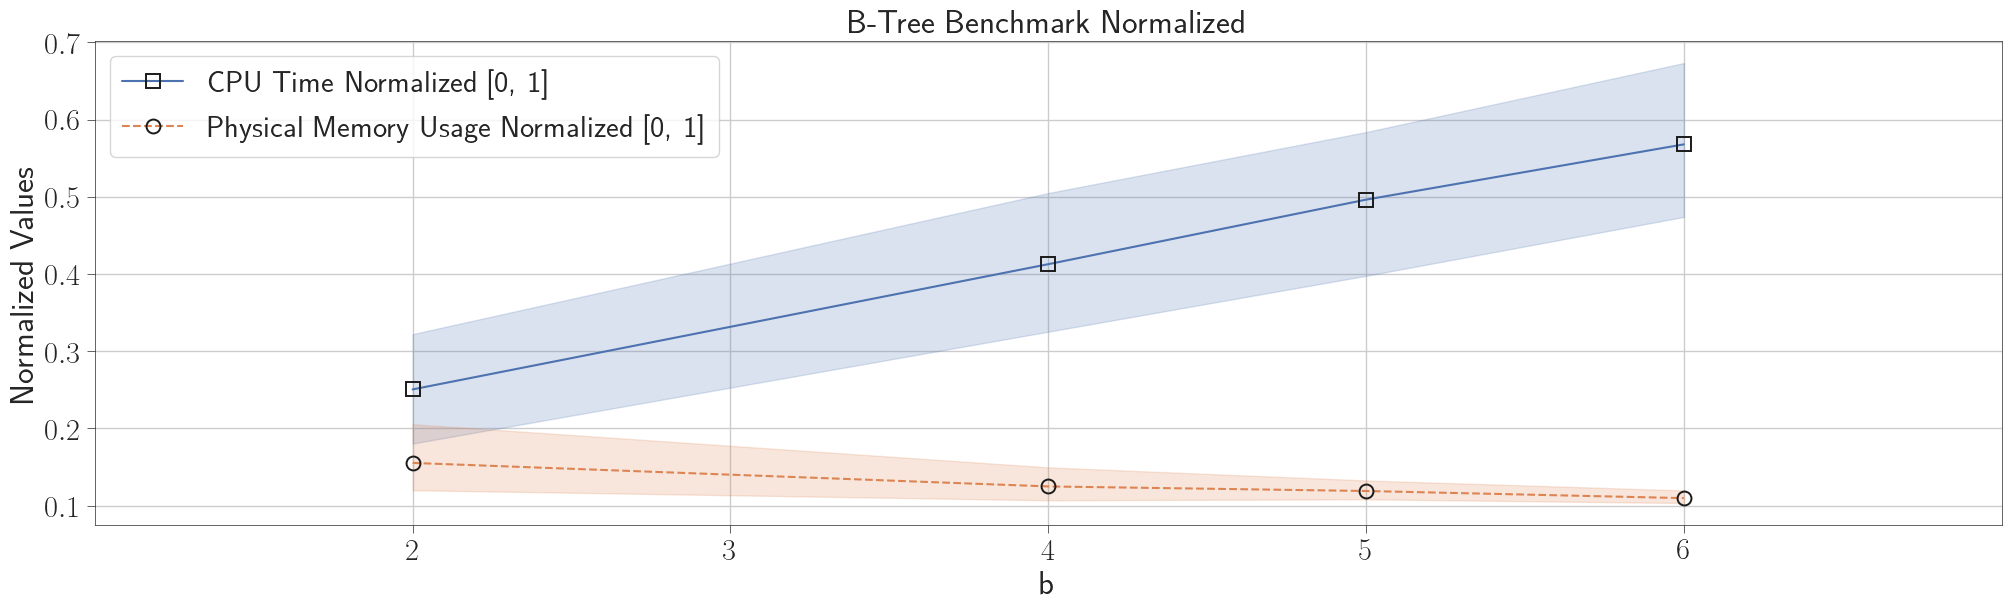

In [63]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axis with constrained layout enabled
fig, ax = plt.subplots(figsize=(20, 6), constrained_layout=True)

# Plot CPU time normalized
sns.lineplot(
    data=btree_df,
    x='b',
    y='cpu_time_ms_norm',
    marker='s',
    markerfacecolor='none',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    linestyle='-',  # Ensure line visibility
    linewidth=1.5,
    label='CPU Time Normalized [0, 1]',
    ax=ax
)

# Plot RAM usage normalized
sns.lineplot(
    data=btree_df,
    x='b',
    y='RAM_norm',
    marker='o',
    markerfacecolor='none',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    linestyle='--',
    linewidth=1.5,
    label='Physical Memory Usage Normalized [0, 1]',
    ax=ax
)

# Set labels and title
ax.set_title("B-Tree Benchmark Normalized")
ax.set_xlabel('b')
ax.set_ylabel('Normalized Values')

# Set grid and legend
ax.grid(True)
ax.legend()

# Adjust tick parameters and spines
ax.tick_params(width=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# Set x-axis limits and ticks based on the actual data range
min_b, max_b = btree_df['b'].min(), btree_df['b'].max()
plt.xlim([min_b - 1, max_b + 1])
plt.xticks(range(min_b, max_b + 1))

# Create the save directory if it doesn't exist
save_path = 'plot/' + ax.get_title().lower().replace(' ', '_') + '.pdf'
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save figure with bbox_inches='tight'
plt.savefig(save_path, bbox_inches='tight')

# Show plot
plt.show()


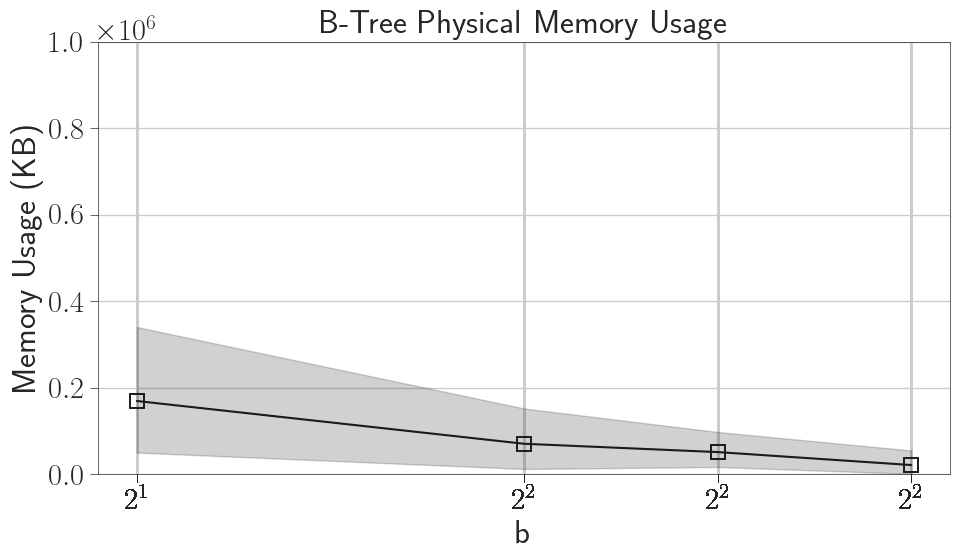

In [48]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
min_value = btree_df['RAM'].min()


sns.lineplot(
    data=btree_df,
    x='b',
    y='RAM',
    marker='s',
    markerfacecolor='none',
    # linestyle='--',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='KB',
    ax=ax
)

ax.set_title("B-Tree Physical Memory Usage")
ax.set_xlabel('b')
ax.set_ylabel('Memory Usage (KB)')
ax.grid(True)
ax.legend().remove()
ax.tick_params(width=0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.xticks( [2**2] + list(btree_df['b'])[8:])
ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

plt.ylim([0, 1E6])

plt.tight_layout()
plt.savefig('plot/' +ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
plt.show()


Second part

In [64]:
with open("../code/macOS/btree/bench_over_n.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']

btree_df = pd.DataFrame(benchmarks)

# btree_df['real_time_ms'] = btree_df['real_time'] / 1e6
btree_df['cpu_time_ms'] = btree_df['cpu_time'] / 1e6
btree_df['RAM'] = btree_df['RAM'].astype(int)
# btree_df['Page'] = btree_df['Page'].astype(int)

btree_df['n'] = btree_df['name'].apply(lambda x: pd.to_numeric(x.split('/')[1]) if len(x.split('/')) > 1 else None)
btree_df['b'] = pd.to_numeric(btree_df['name'].str.extract(r'<(\d+)>')[0])
btree_df['name'] = btree_df['name'].apply(lambda x: x.split('/')[0] if '/' in x else x)
btree_df['operation'] = btree_df['name'].apply(lambda x: x.split('_')[1].split('<')[0] if '_' in x else x)
btree_df['name'] = btree_df['name'].apply(lambda x: x.split('_')[0].split('>')[0] if '_' in x else x)

# btree_df['cpu_time_ms_norm'] = (btree_df['cpu_time_ms'] - btree_df['cpu_time_ms'].min()) / (btree_df['cpu_time_ms'].max() - btree_df['cpu_time_ms'].min())
btree_df['RAM_norm'] = (btree_df['RAM'] - btree_df['RAM'].min()) / (btree_df['RAM'].max() - btree_df['RAM'].min())
# btree_df['Page_norm'] = scaler.fit_transform(btree_df[['Page']])

btree_df

name  family_index  per_family_instance_index  \
0    OrderedMap             0                          0   
1    OrderedMap             0                          1   
2    OrderedMap             0                          2   
3    OrderedMap             0                          3   
4    OrderedMap             0                          4   
..          ...           ...                        ...   
225    BTreeMap             9                         18   
226    BTreeMap             9                         19   
227    BTreeMap             9                         20   
228    BTreeMap             9                         21   
229    BTreeMap             9                         22   

                        run_name   run_type  repetitions  repetition_index  \
0         OrderedMap_Insertion/8  iteration            1                 0   
1        OrderedMap_Insertion/16  iteration            1                 0   
2        OrderedMap_Insertion/32  iteration            1                 0   
3        OrderedMap_Insertion/64  iteration            1                 0   
4       OrderedMap_Insertion/128  iteration            1                 0   
..                           ...        ...          ...               ...   
225   BTreeMap_Search<6>/2097152  iteration            1                 0   
226   BTreeMap_Search<6>/4194304  iteration            1                 0   
227   BTreeMap_Search<6>/8388608  iteration            1                 0   
228  BTreeMap_Search<6>/16777216  iteration            1                 0   
229  BTreeMap_Search<6>/33554432  iteration            1                 0   

     threads  iterations     real_time      cpu_time time_unit      Page  \
0          1           1  2.836799e+14  1.005150e+09        ns       0.0   
1          1           1  2.836799e+14  1.005194e+09        ns       0.0   
2          1           1  2.836799e+14  1.005221e+09        ns       0.0   
3          1           1  2.836799e+14  1.005248e+09        ns       0.0   
4          1           1  2.836799e+14  1.005283e+09        ns       0.0   
..       ...         ...           ...           ...       ...       ...   
225        1           1  2.841936e+14  5.143695e+11        ns   30720.0   
226        1           1  2.841952e+14  5.159638e+11        ns   60416.0   
227        1           1  2.841994e+14  5.200709e+11        ns  120832.0   
228        1           1  2.842086e+14  5.293886e+11        ns  242688.0   
229        1           1  2.842357e+14  5.563692e+11        ns  485376.0   

        RAM  cpu_time_ms         n    b  operation  RAM_norm  
0        16     1005.150         8  NaN  Insertion  0.265228  
1         0     1005.194        16  NaN  Insertion  0.265219  
2         0     1005.221        32  NaN  Insertion  0.265219  
3         0     1005.248        64  NaN  Insertion  0.265219  
4         0     1005.283       128  NaN  Insertion  0.265219  
..      ...          ...       ...  ...        ...       ...  
225   15264   514369.491   2097152  6.0     Search  0.272918  
226  -59616   515963.827   4194304  6.0     Search  0.235152  
227 -172704   520070.890   8388608  6.0     Search  0.178115  
228 -267040   529388.624  16777216  6.0     Search  0.130536  
229 -525856   556369.176  33554432  6.0     Search  0.000000  

[230 rows x 19 columns]

In [53]:

btree_df.drop(columns=['real_time', 'cpu_time','iterations', 'repetition_index', 'run_name', 'repetitions', 'threads', 'run_type', 'family_index', 'per_family_instance_index', 'time_unit', 'Page', 'real_time'], inplace=True)

btree_df.rename(columns={
    'cpu_time_ms_norm': 'CPU Time Normalized [0, 1]',
    'cpu_time_ms': 'CPU Time (ms)',
    'RAM': 'Physical Memory Usage (KB)',
    'RAM_norm': 'Physical Memory Usage Normalized [0, 1]',
}, inplace=True)

btree_df

name  Physical Memory Usage (KB)  CPU Time (ms)         n    b  \
0    OrderedMap                          16       1005.150         8  NaN   
1    OrderedMap                           0       1005.194        16  NaN   
2    OrderedMap                           0       1005.221        32  NaN   
3    OrderedMap                           0       1005.248        64  NaN   
4    OrderedMap                           0       1005.283       128  NaN   
..          ...                         ...            ...       ...  ...   
225    BTreeMap                       15264     514369.491   2097152  6.0   
226    BTreeMap                      -59616     515963.827   4194304  6.0   
227    BTreeMap                     -172704     520070.890   8388608  6.0   
228    BTreeMap                     -267040     529388.624  16777216  6.0   
229    BTreeMap                     -525856     556369.176  33554432  6.0   

     operation  Physical Memory Usage Normalized [0, 1]  
0    Insertion                                 0.265228  
1    Insertion                                 0.265219  
2    Insertion                                 0.265219  
3    Insertion                                 0.265219  
4    Insertion                                 0.265219  
..         ...                                      ...  
225     Search                                 0.272918  
226     Search                                 0.235152  
227     Search                                 0.178115  
228     Search                                 0.130536  
229     Search                                 0.000000  

[230 rows x 7 columns]

In [65]:
names = btree_df['name'].unique().tolist()
operations = btree_df['operation'].unique()

df_filtered_btree = btree_df[btree_df['name'] == 'BTreeMap']
df_filtered_map = btree_df[btree_df['name'] == 'OrderedMap']

exclude_columns = ['name', 'n', 'operation', 'b']

unique_names = btree_df['name'].unique().tolist()
print(unique_names)
print(operations)

btree_df

['OrderedMap', 'BTreeMap']
['Insertion' 'Search']


name  family_index  per_family_instance_index  \
0    OrderedMap             0                          0   
1    OrderedMap             0                          1   
2    OrderedMap             0                          2   
3    OrderedMap             0                          3   
4    OrderedMap             0                          4   
..          ...           ...                        ...   
225    BTreeMap             9                         18   
226    BTreeMap             9                         19   
227    BTreeMap             9                         20   
228    BTreeMap             9                         21   
229    BTreeMap             9                         22   

                        run_name   run_type  repetitions  repetition_index  \
0         OrderedMap_Insertion/8  iteration            1                 0   
1        OrderedMap_Insertion/16  iteration            1                 0   
2        OrderedMap_Insertion/32  iteration            1                 0   
3        OrderedMap_Insertion/64  iteration            1                 0   
4       OrderedMap_Insertion/128  iteration            1                 0   
..                           ...        ...          ...               ...   
225   BTreeMap_Search<6>/2097152  iteration            1                 0   
226   BTreeMap_Search<6>/4194304  iteration            1                 0   
227   BTreeMap_Search<6>/8388608  iteration            1                 0   
228  BTreeMap_Search<6>/16777216  iteration            1                 0   
229  BTreeMap_Search<6>/33554432  iteration            1                 0   

     threads  iterations     real_time      cpu_time time_unit      Page  \
0          1           1  2.836799e+14  1.005150e+09        ns       0.0   
1          1           1  2.836799e+14  1.005194e+09        ns       0.0   
2          1           1  2.836799e+14  1.005221e+09        ns       0.0   
3          1           1  2.836799e+14  1.005248e+09        ns       0.0   
4          1           1  2.836799e+14  1.005283e+09        ns       0.0   
..       ...         ...           ...           ...       ...       ...   
225        1           1  2.841936e+14  5.143695e+11        ns   30720.0   
226        1           1  2.841952e+14  5.159638e+11        ns   60416.0   
227        1           1  2.841994e+14  5.200709e+11        ns  120832.0   
228        1           1  2.842086e+14  5.293886e+11        ns  242688.0   
229        1           1  2.842357e+14  5.563692e+11        ns  485376.0   

        RAM  cpu_time_ms         n    b  operation  RAM_norm  
0        16     1005.150         8  NaN  Insertion  0.265228  
1         0     1005.194        16  NaN  Insertion  0.265219  
2         0     1005.221        32  NaN  Insertion  0.265219  
3         0     1005.248        64  NaN  Insertion  0.265219  
4         0     1005.283       128  NaN  Insertion  0.265219  
..      ...          ...       ...  ...        ...       ...  
225   15264   514369.491   2097152  6.0     Search  0.272918  
226  -59616   515963.827   4194304  6.0     Search  0.235152  
227 -172704   520070.890   8388608  6.0     Search  0.178115  
228 -267040   529388.624  16777216  6.0     Search  0.130536  
229 -525856   556369.176  33554432  6.0     Search  0.000000  

[230 rows x 19 columns]

bt family_index
bt family_index
bt family_index
bt family_index
om family_index


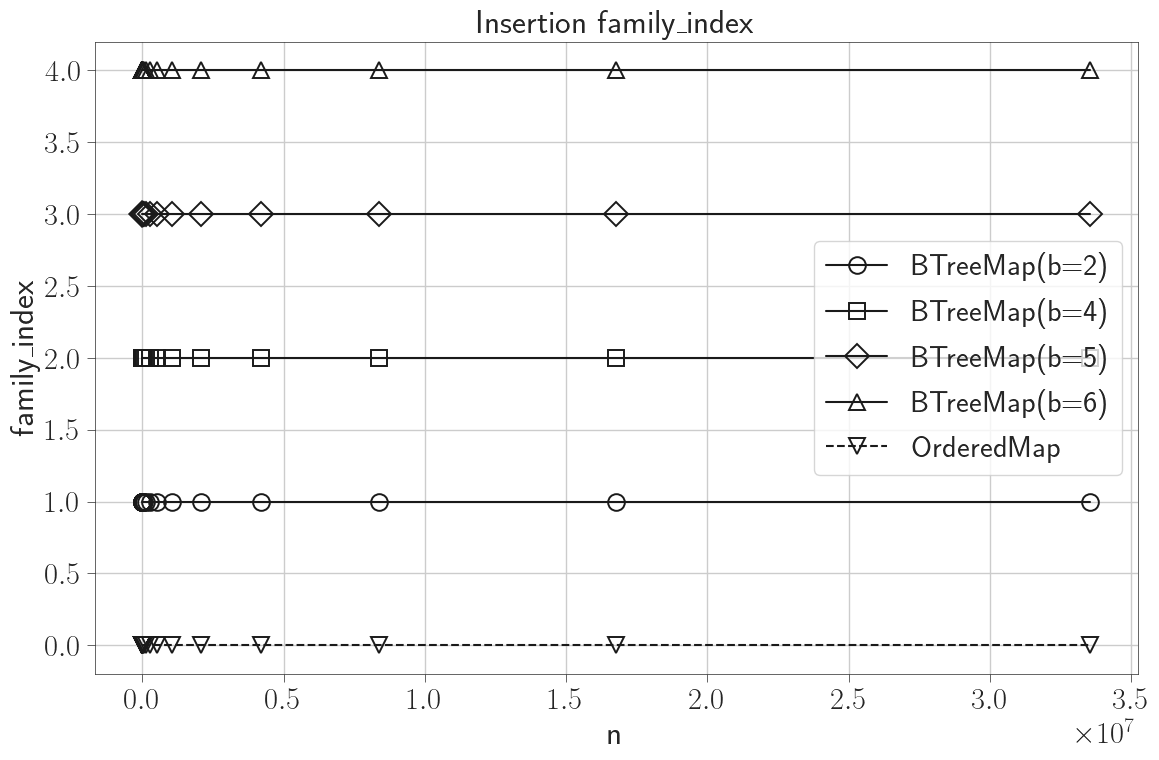

bt per_family_instance_index
bt per_family_instance_index
bt per_family_instance_index
bt per_family_instance_index
om per_family_instance_index


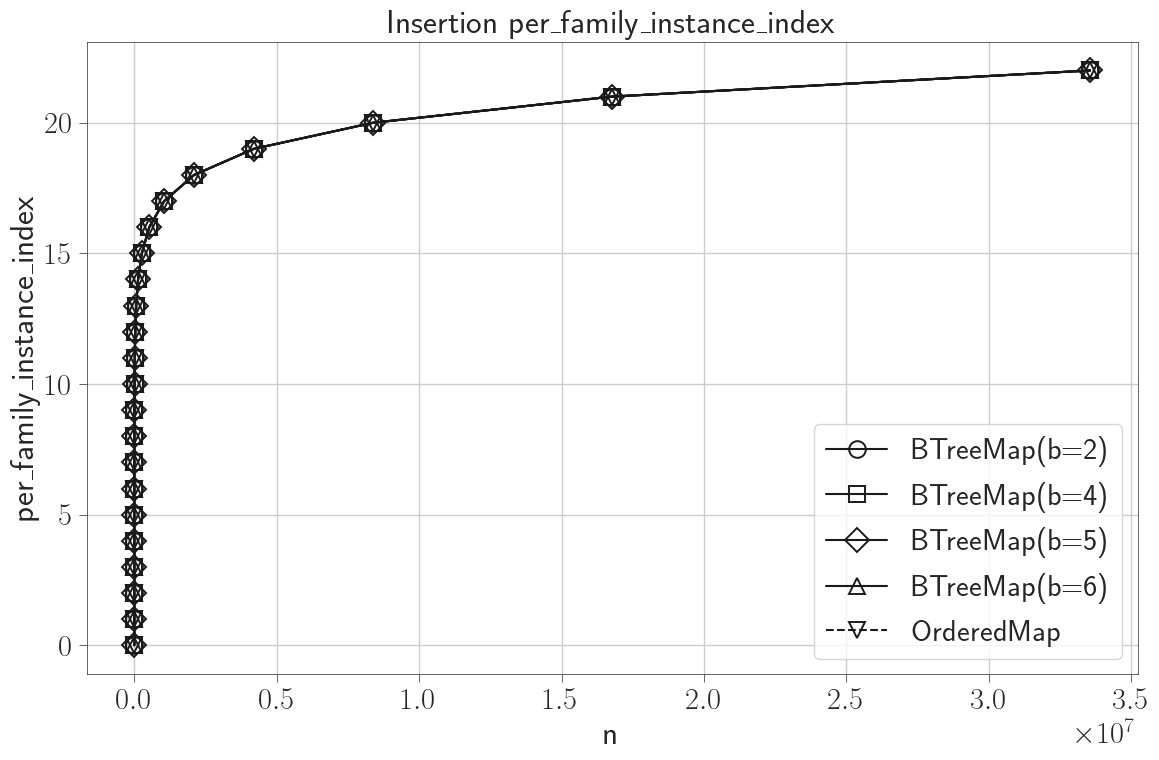

bt run_name
bt run_name
bt run_name
bt run_name
om run_name


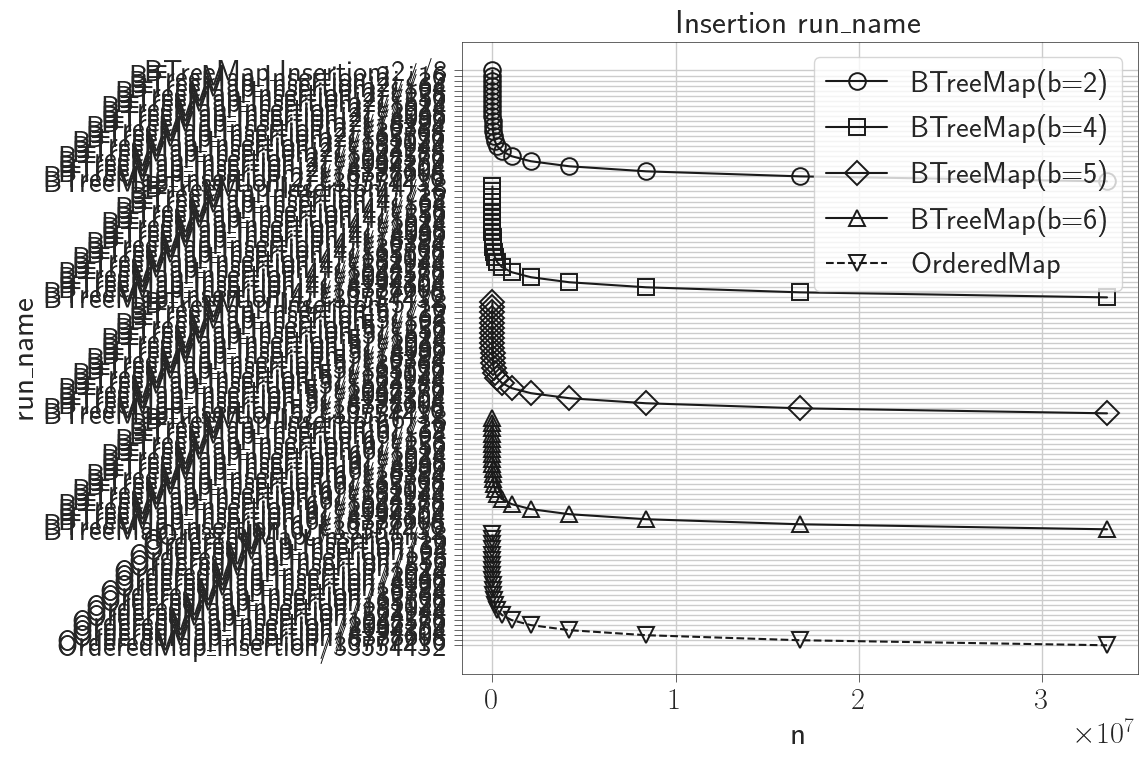

bt run_type
bt run_type
bt run_type
bt run_type
om run_type


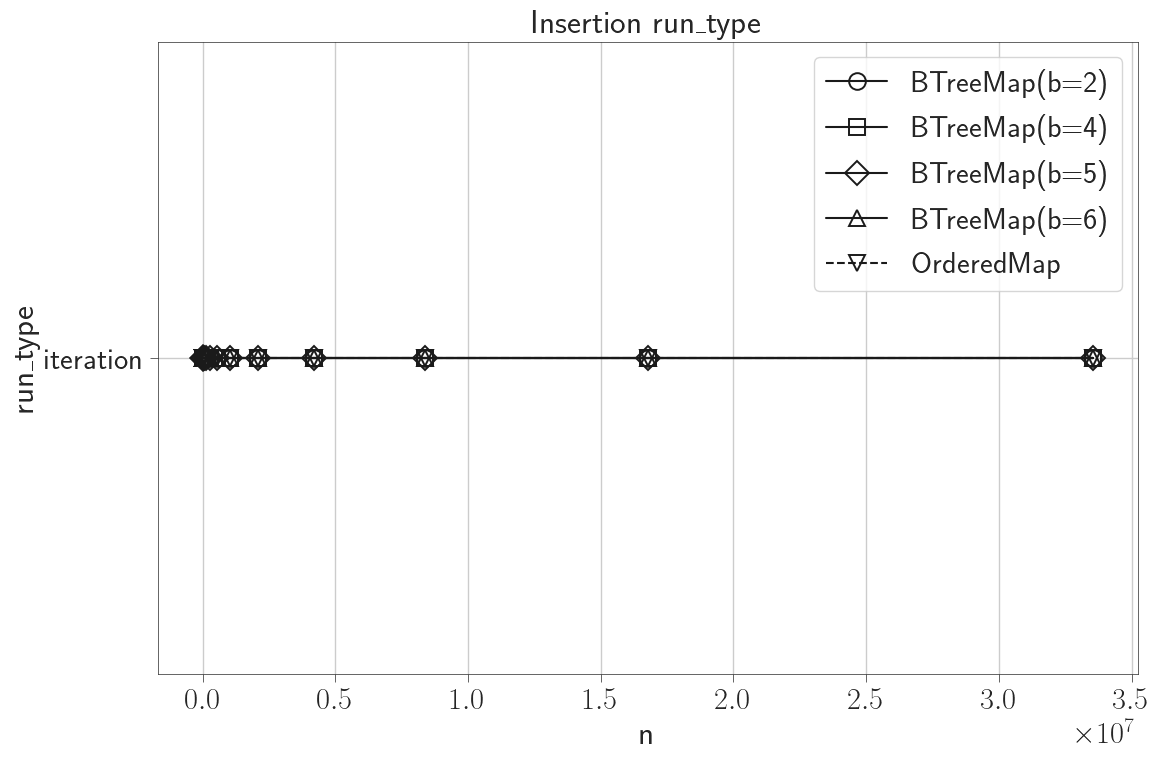

bt repetitions
bt repetitions
bt repetitions
bt repetitions
om repetitions


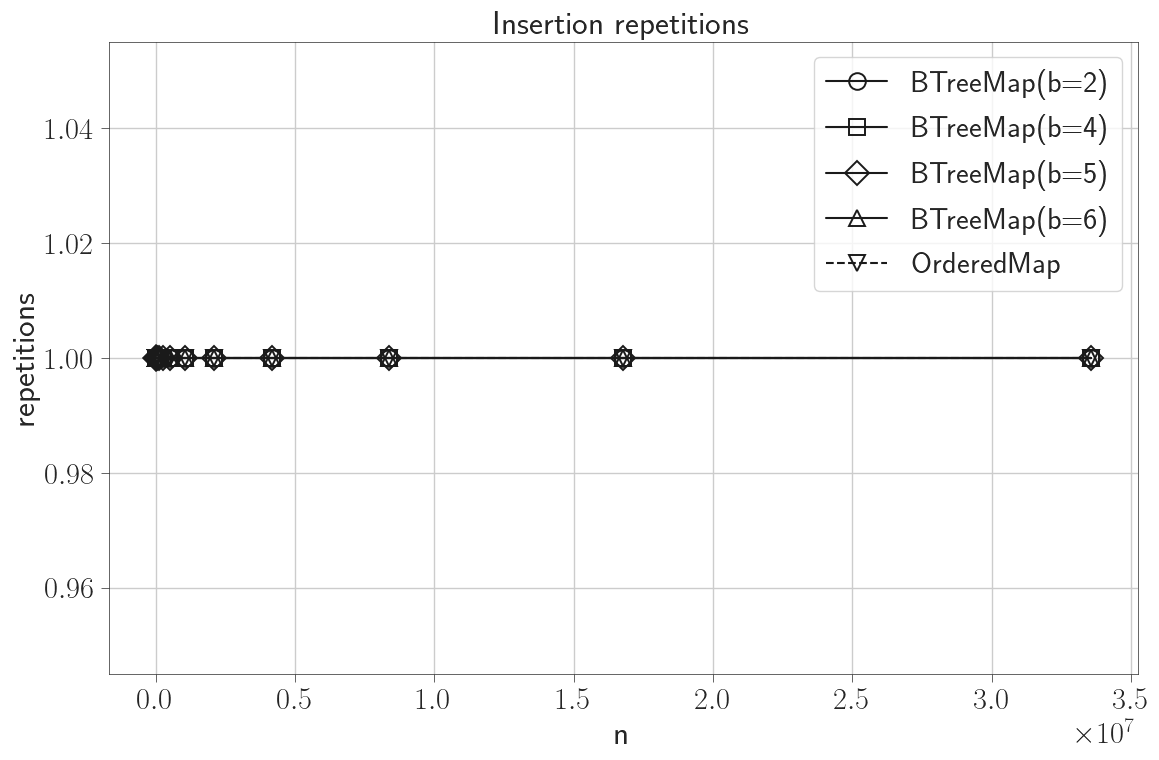

bt repetition_index
bt repetition_index
bt repetition_index
bt repetition_index
om repetition_index


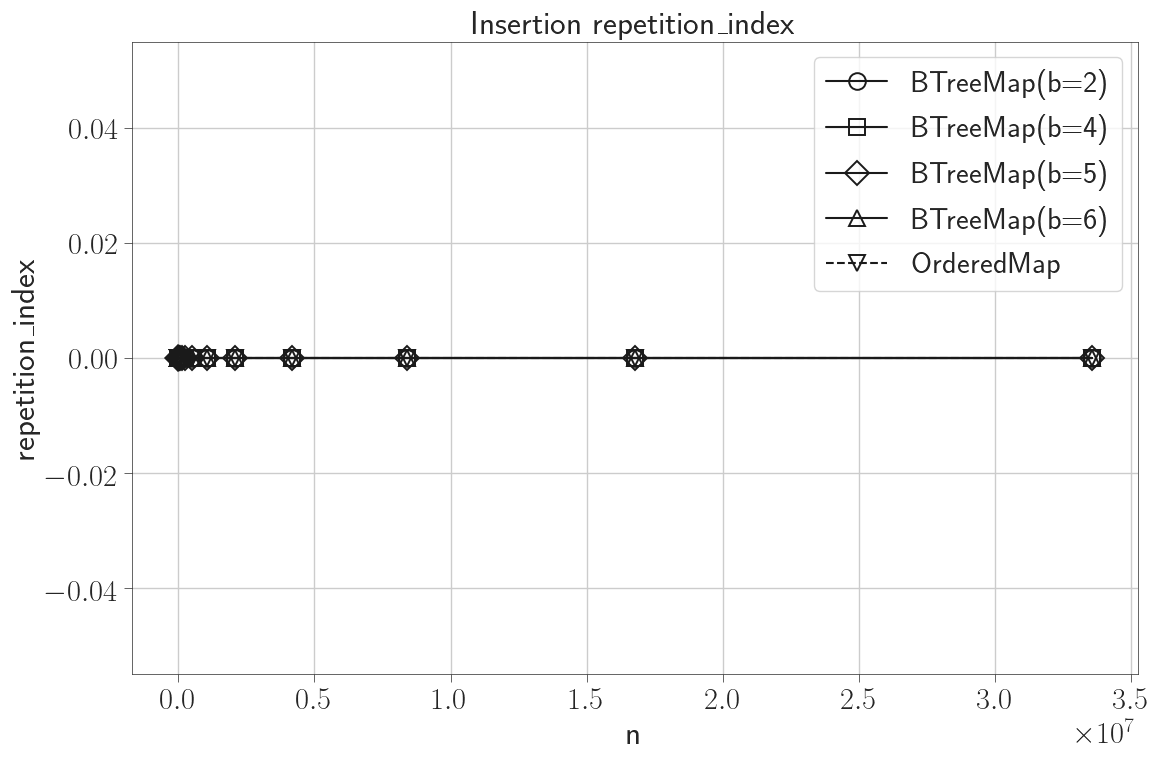

bt threads
bt threads
bt threads
bt threads
om threads


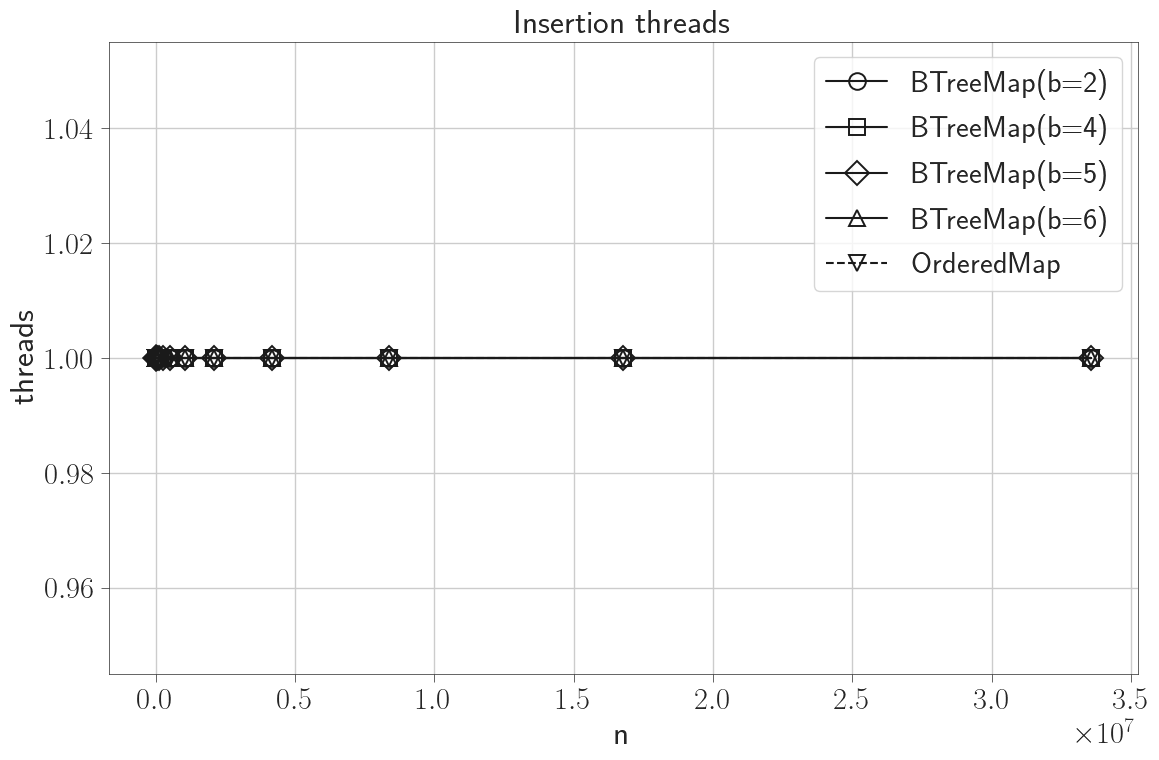

bt iterations
bt iterations
bt iterations
bt iterations
om iterations


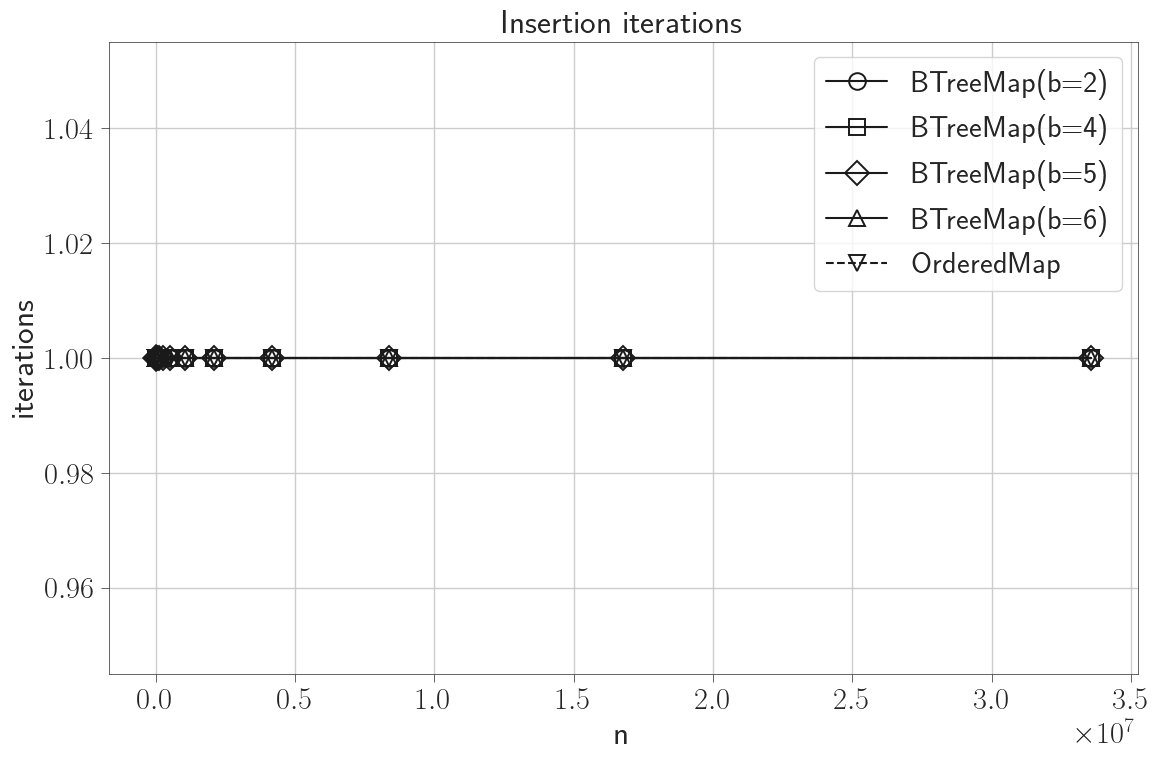

bt real_time
bt real_time
bt real_time
bt real_time
om real_time


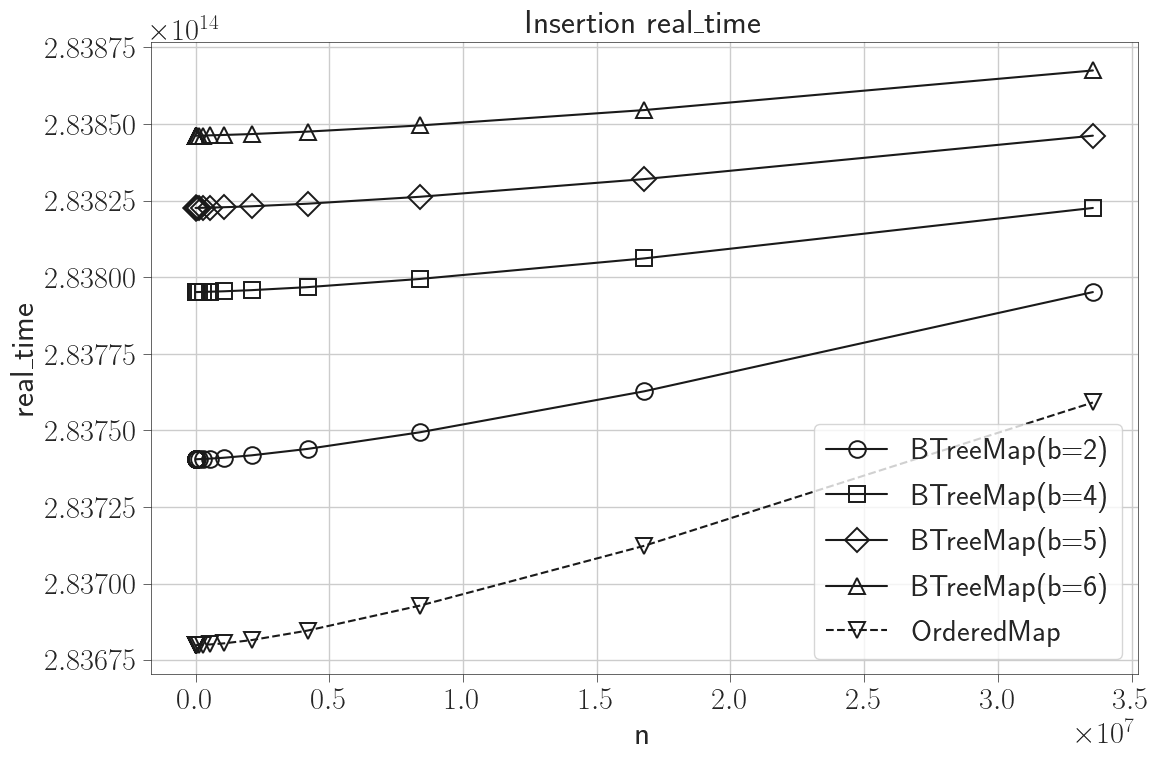

bt cpu_time
bt cpu_time
bt cpu_time
bt cpu_time
om cpu_time


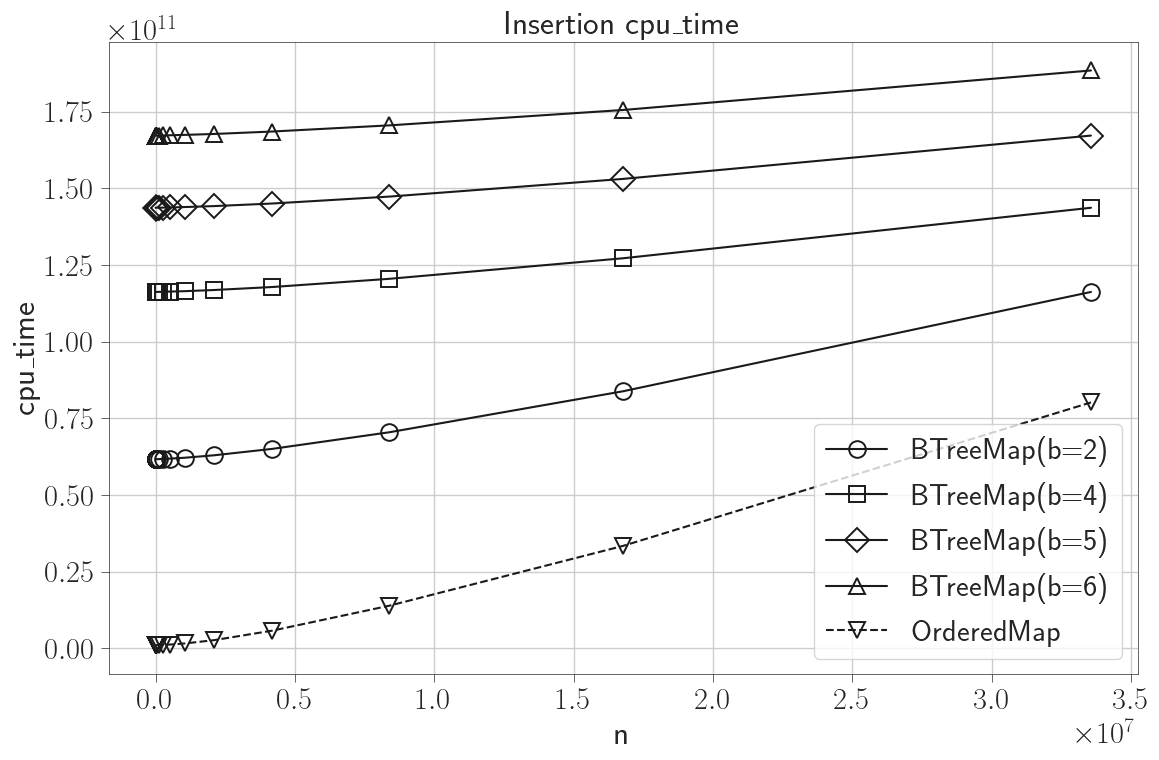

bt time_unit
bt time_unit
bt time_unit
bt time_unit
om time_unit


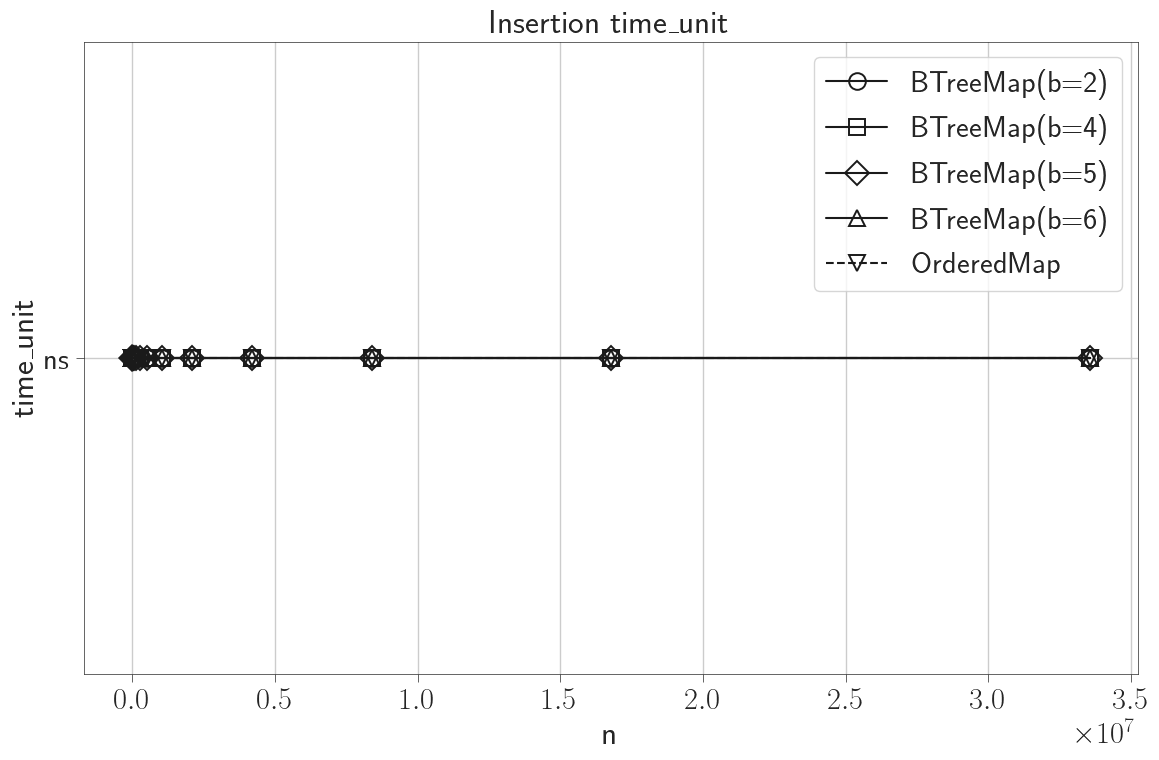

bt Page
bt Page
bt Page
bt Page
om Page


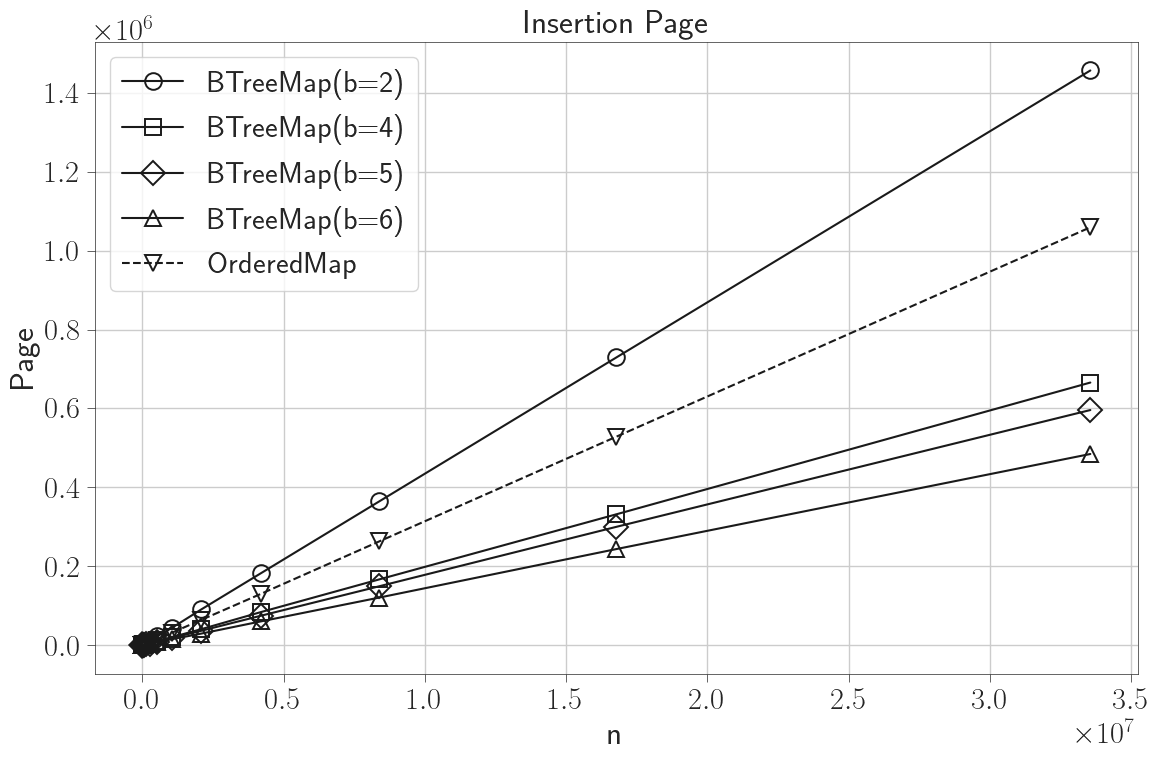

bt RAM
bt RAM
bt RAM
bt RAM
om RAM


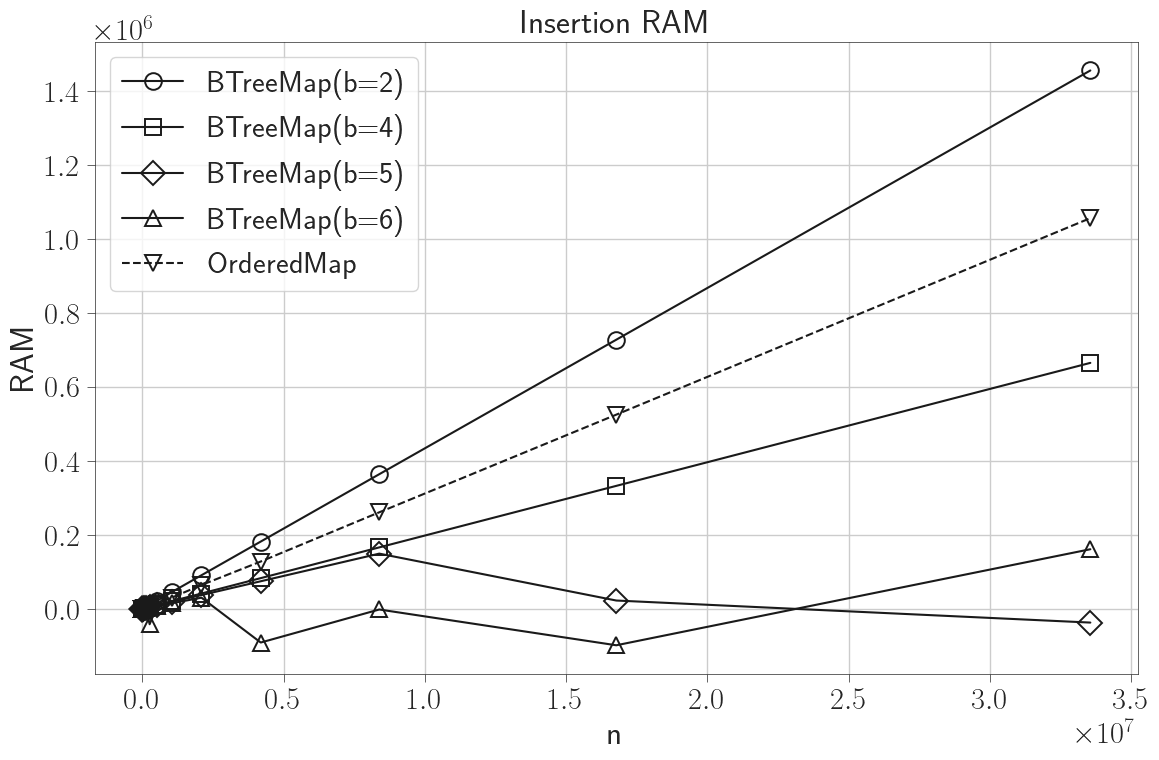

bt cpu_time_ms
bt cpu_time_ms
bt cpu_time_ms
bt cpu_time_ms
om cpu_time_ms


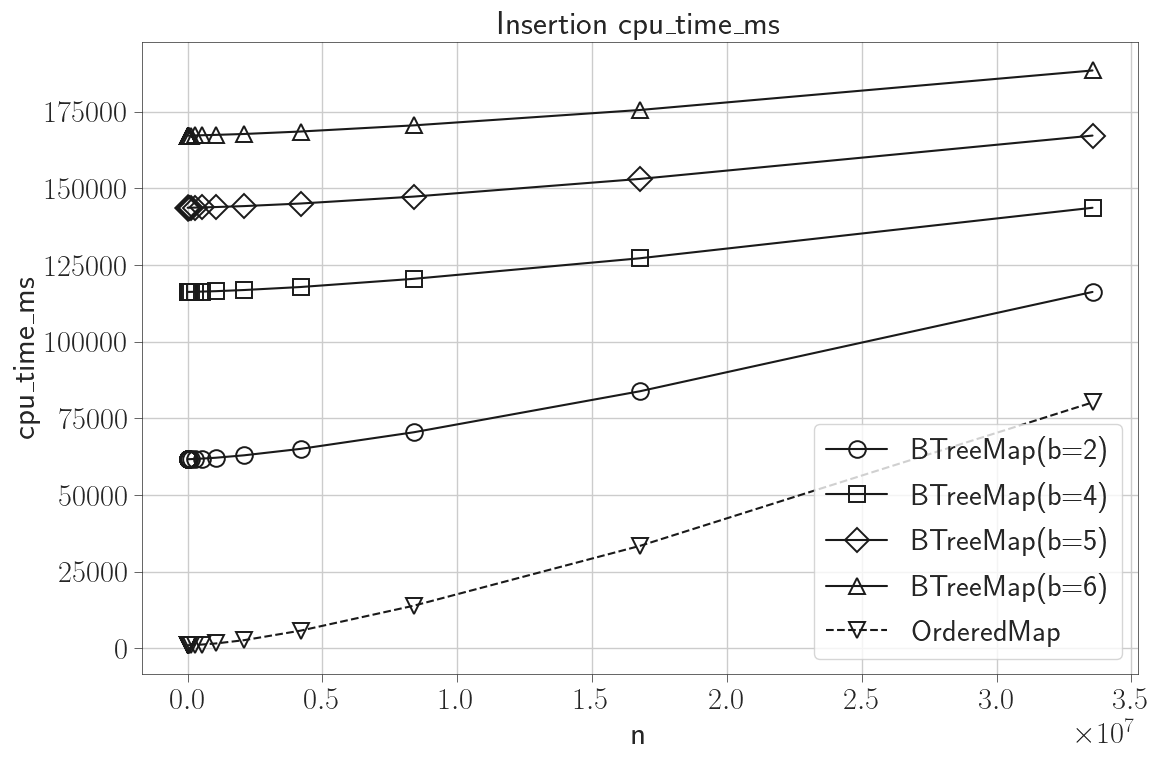

bt RAM_norm
bt RAM_norm
bt RAM_norm
bt RAM_norm
om RAM_norm


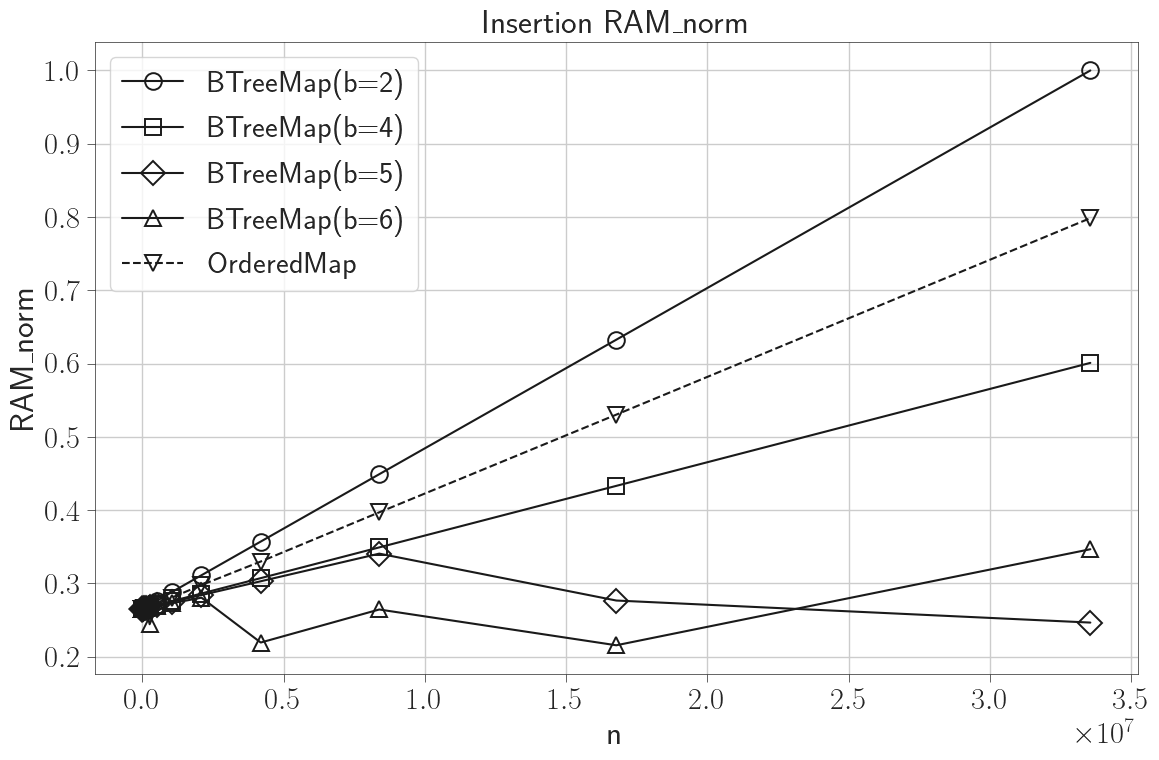

bt family_index
bt family_index
bt family_index
bt family_index
om family_index


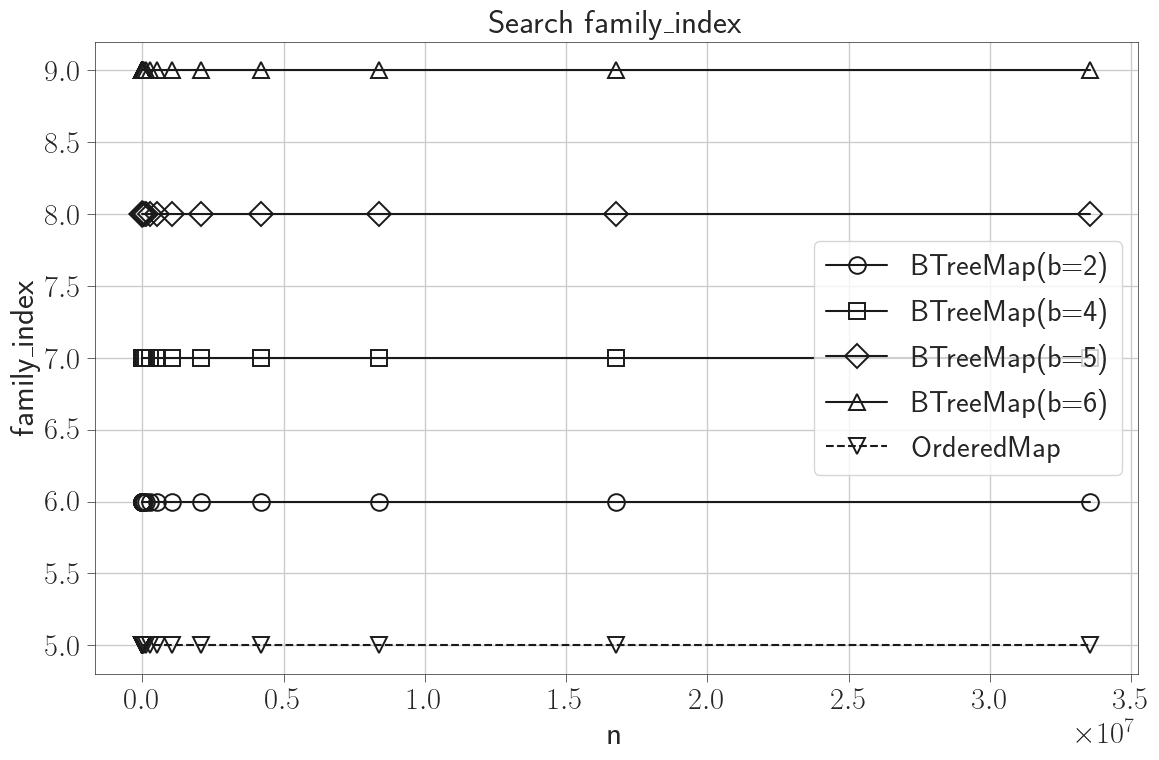

bt per_family_instance_index
bt per_family_instance_index
bt per_family_instance_index
bt per_family_instance_index
om per_family_instance_index


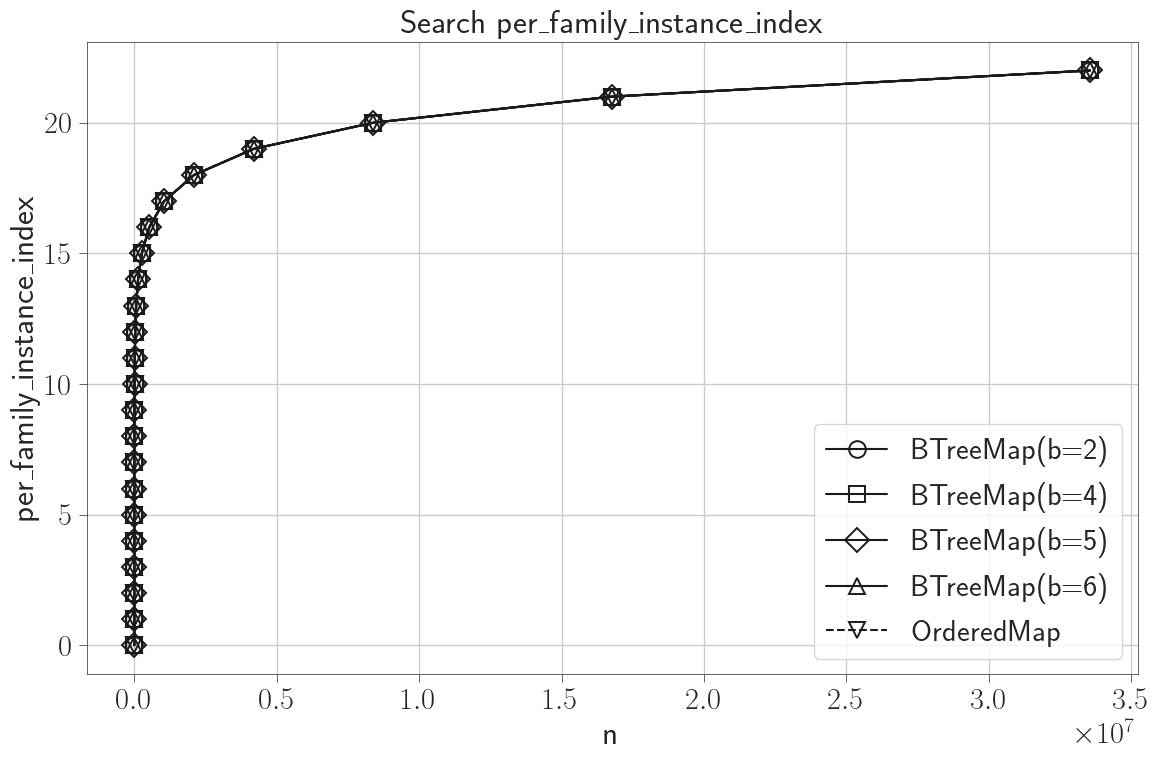

bt run_name
bt run_name
bt run_name
bt run_name
om run_name


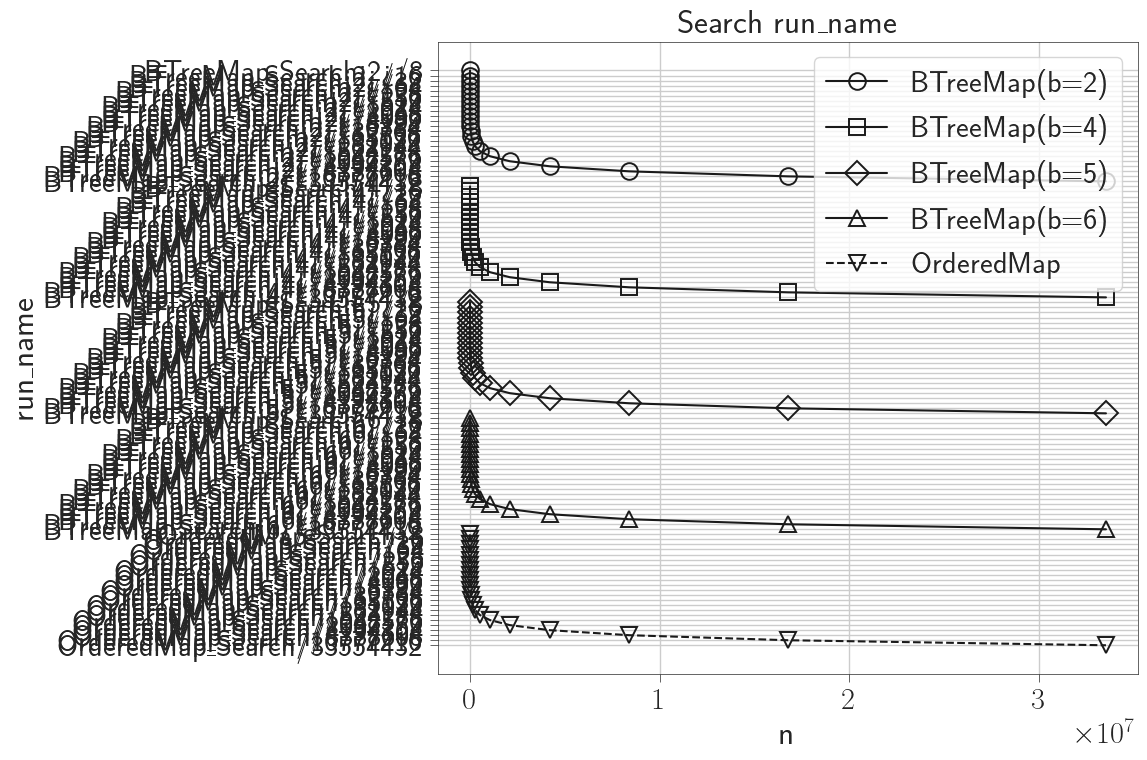

bt run_type
bt run_type
bt run_type
bt run_type
om run_type


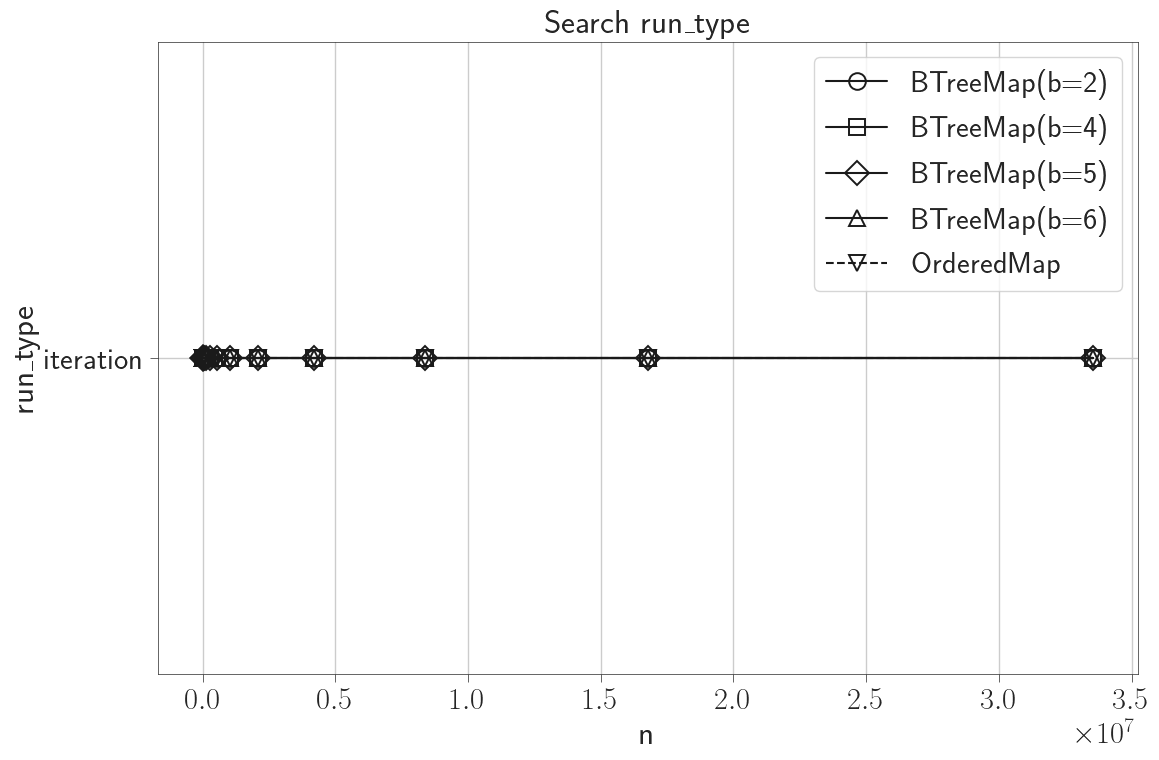

bt repetitions
bt repetitions
bt repetitions
bt repetitions
om repetitions


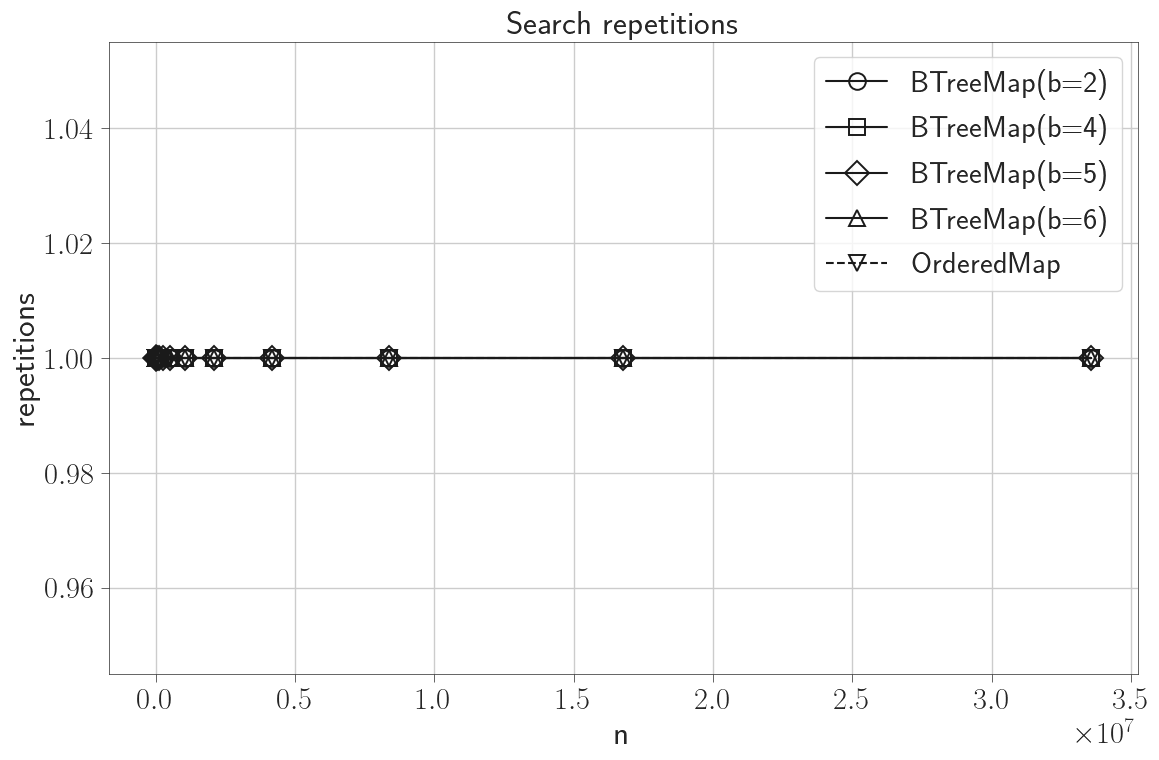

bt repetition_index
bt repetition_index
bt repetition_index
bt repetition_index
om repetition_index


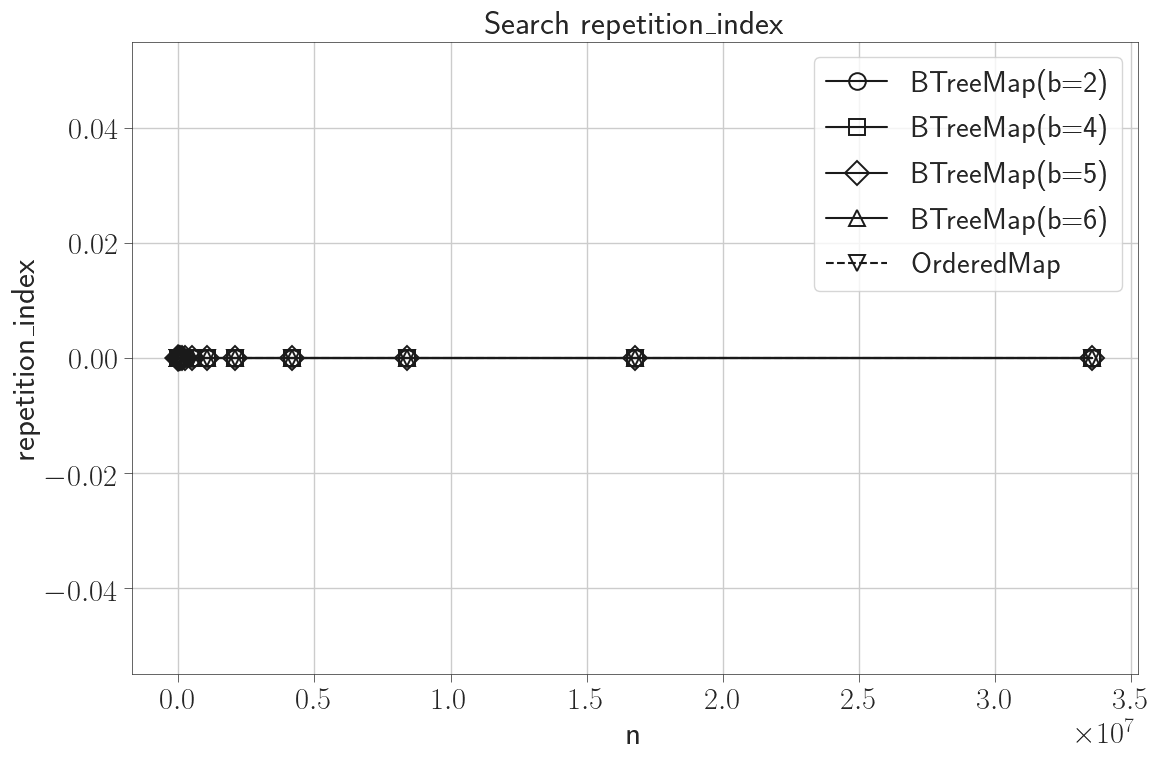

bt threads
bt threads
bt threads
bt threads
om threads


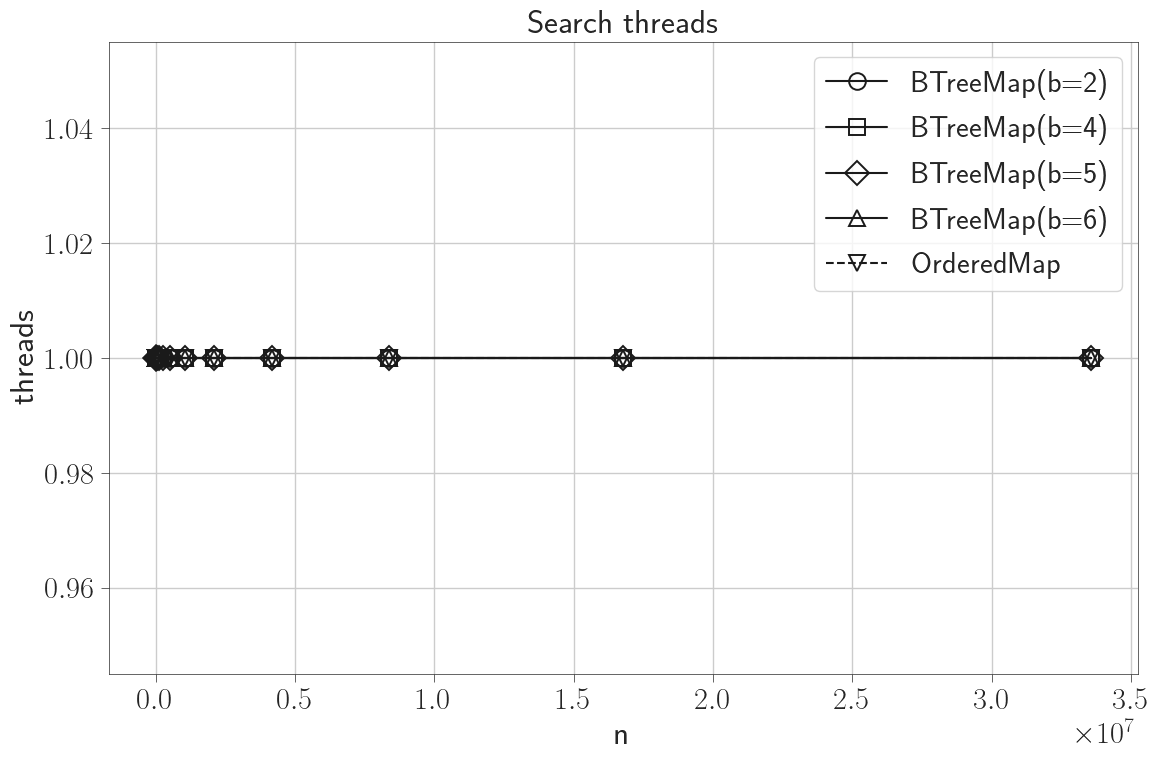

bt iterations
bt iterations
bt iterations
bt iterations
om iterations


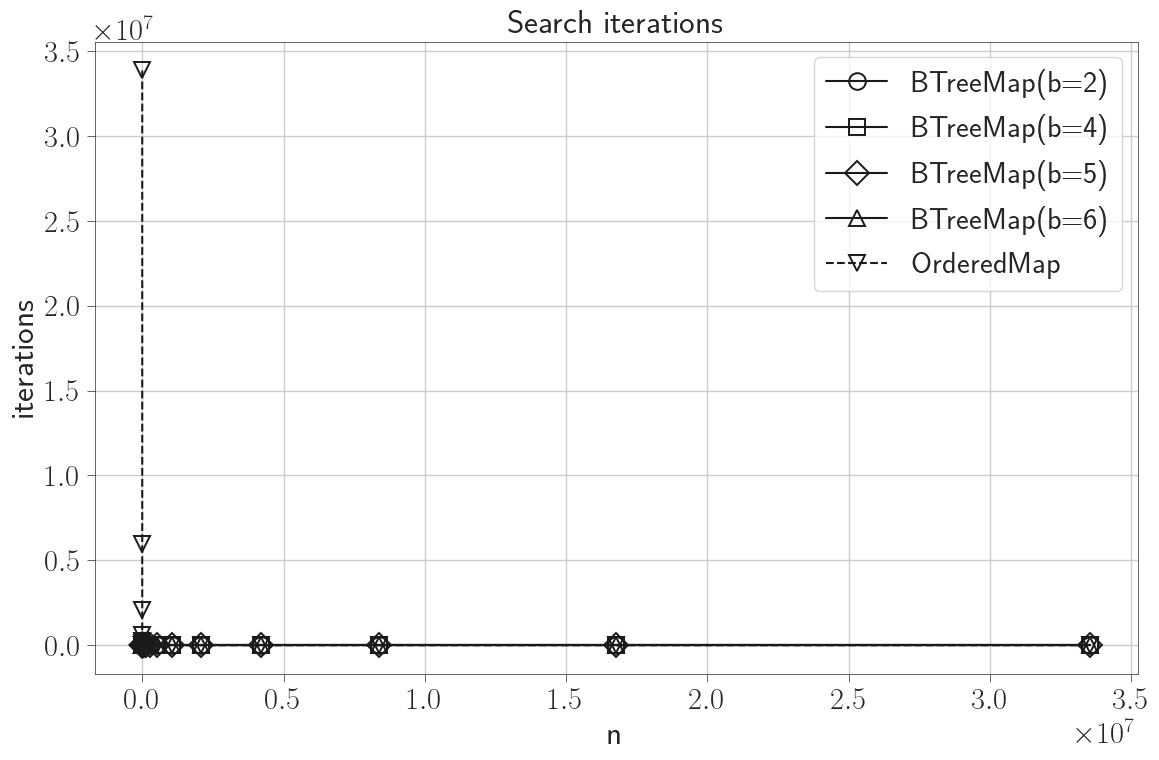

bt real_time
bt real_time
bt real_time
bt real_time
om real_time


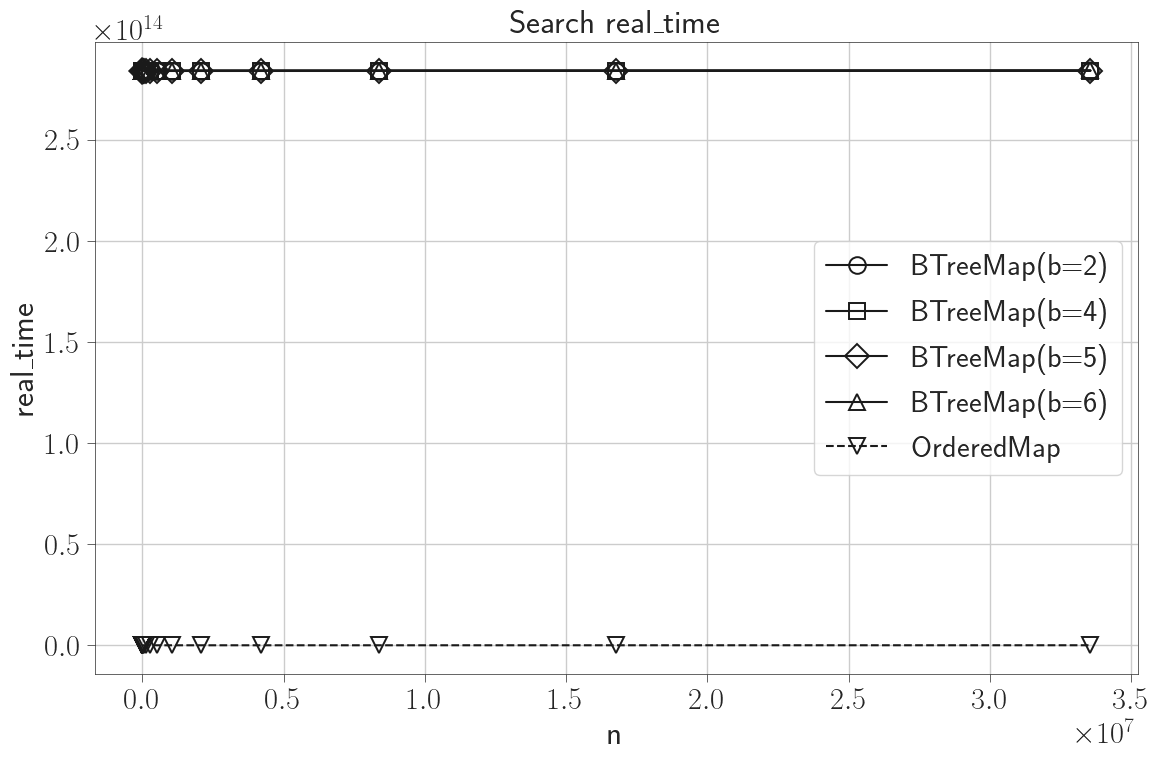

bt cpu_time
bt cpu_time
bt cpu_time
bt cpu_time
om cpu_time


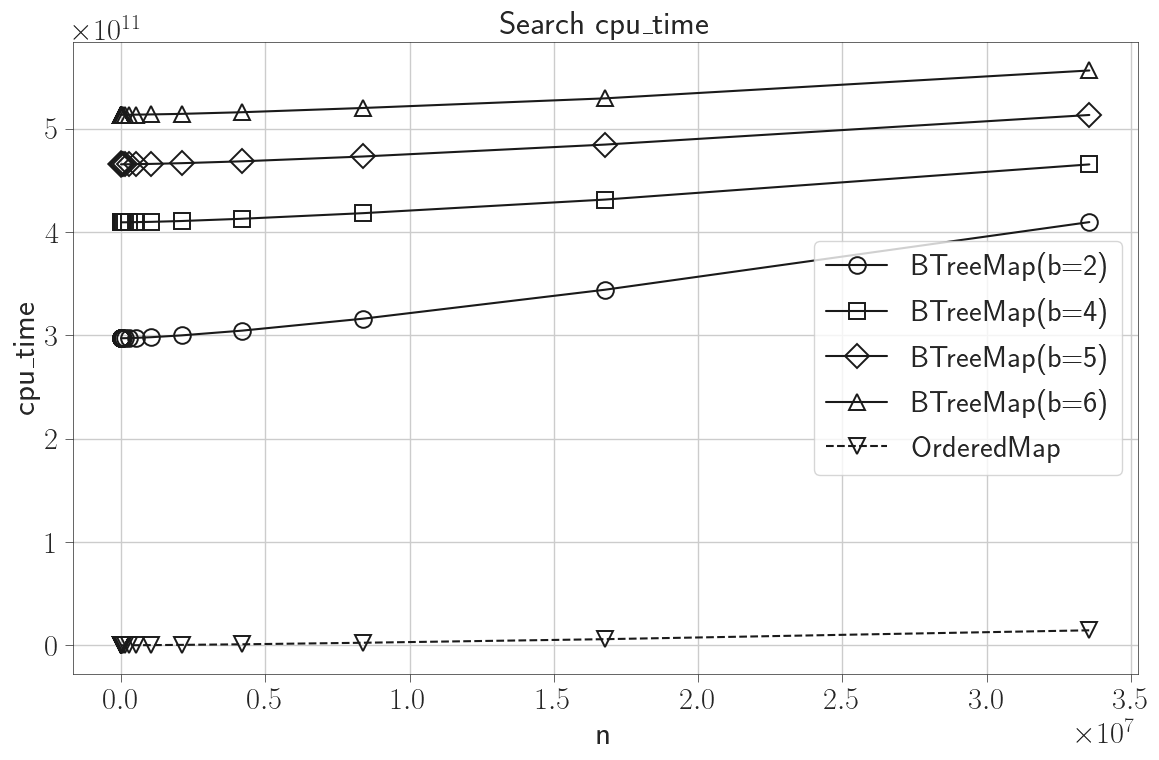

bt time_unit
bt time_unit
bt time_unit
bt time_unit
om time_unit


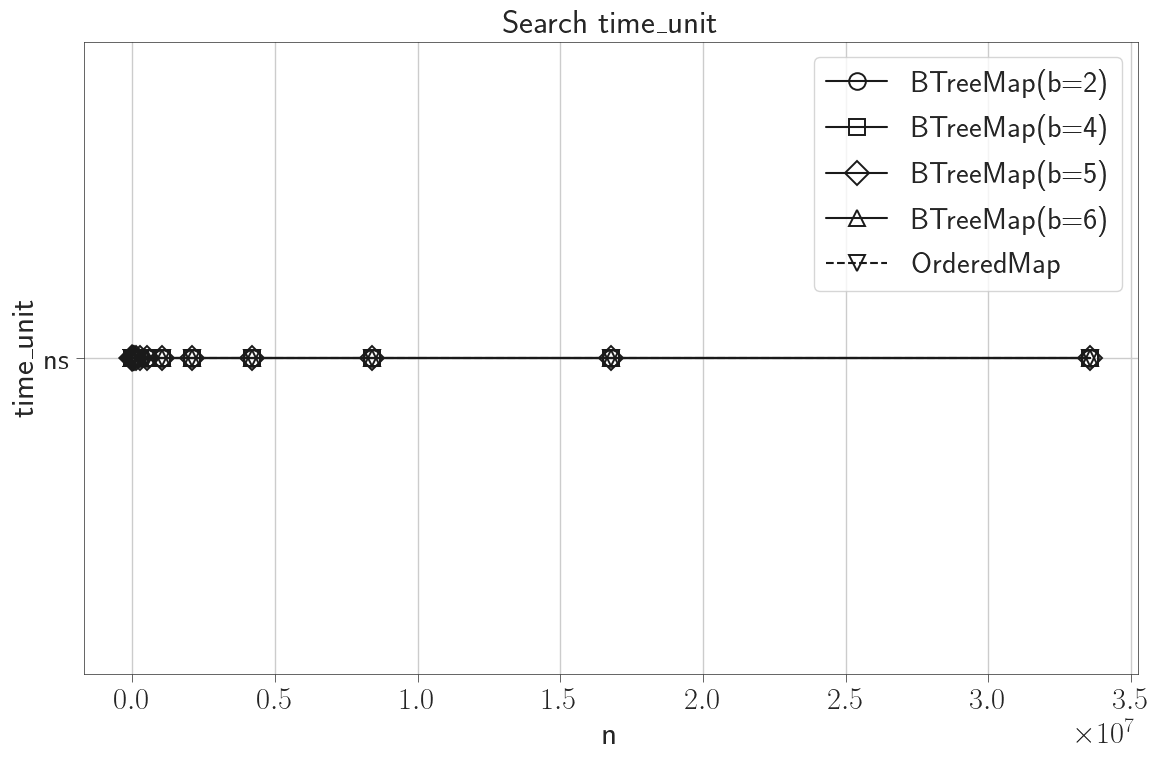

bt Page
bt Page
bt Page
bt Page
om Page


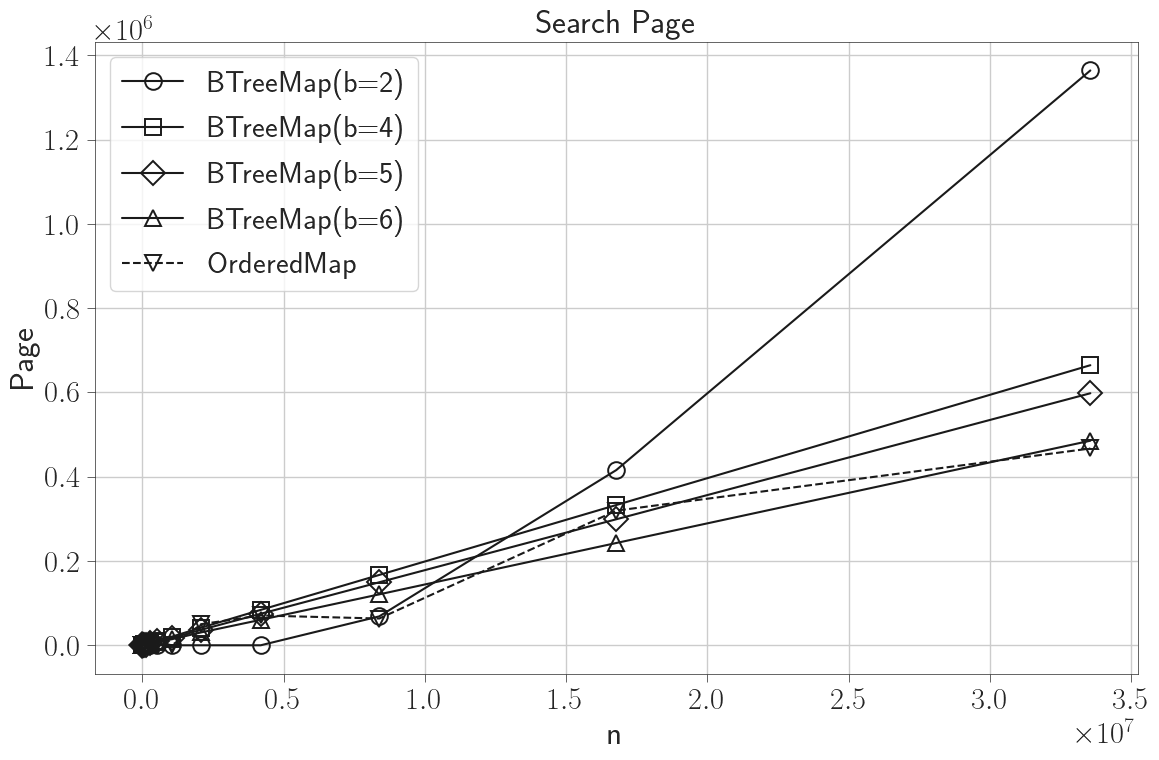

bt RAM
bt RAM
bt RAM
bt RAM
om RAM


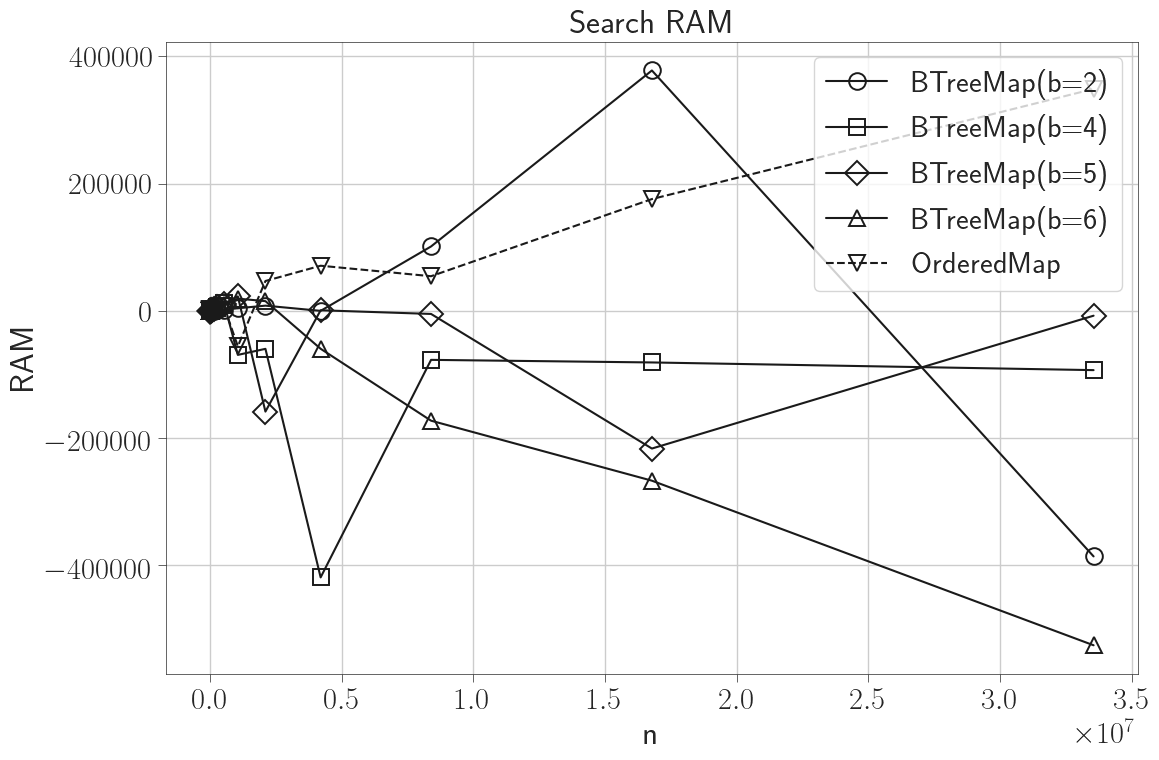

bt cpu_time_ms
bt cpu_time_ms
bt cpu_time_ms
bt cpu_time_ms
om cpu_time_ms


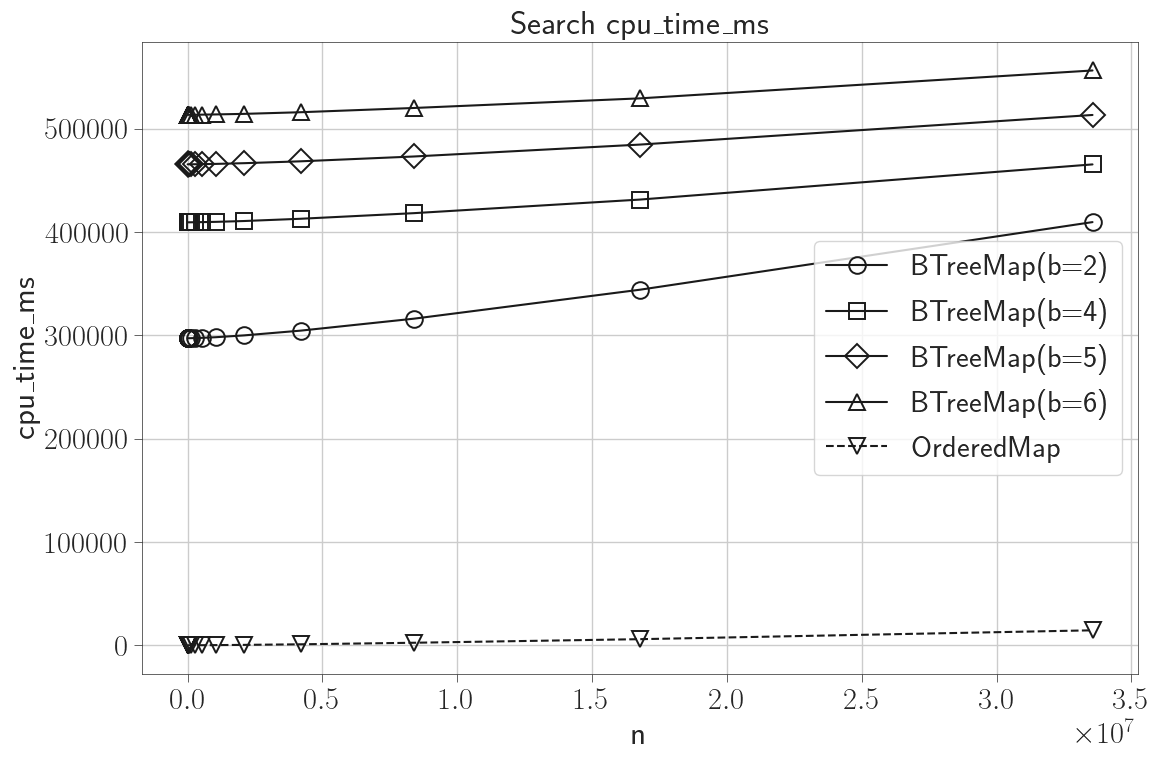

bt RAM_norm
bt RAM_norm
bt RAM_norm
bt RAM_norm
om RAM_norm


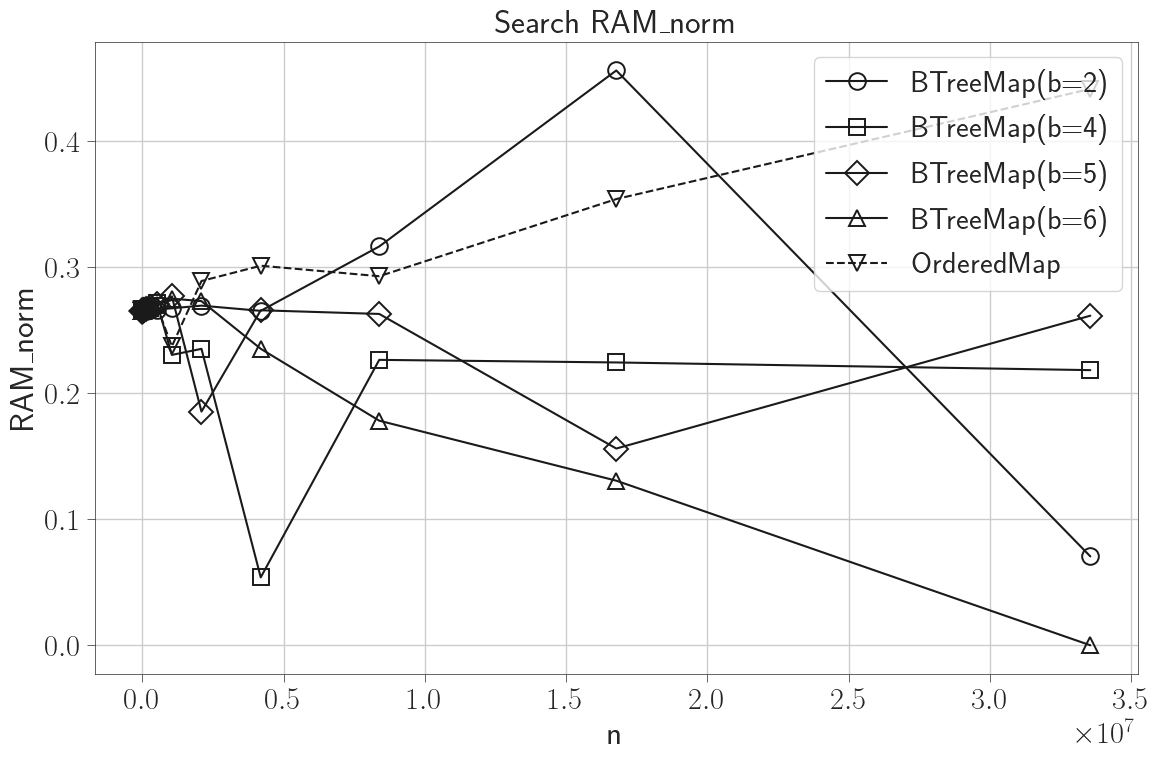

In [66]:
# Get unique names

# Columns to exclude from plotting

# Plot each unique name

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_filtered_btree_op = df_filtered_btree[df_filtered_btree['operation'] == op]
    df_filtered_map_op = df_filtered_map[df_filtered_map['operation'] == op]

    for column in df_filtered_btree.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(12, 8))

            marker_cyc = itertools.cycle(markers)

            for b in df_filtered_btree_op['b'].unique():
                print(f'bt {column}')
                sns.lineplot(
                    data=df_filtered_btree_op[df_filtered_btree_op['b'] == b],
                    x='n',
                    y=column,
                    marker=next(marker_cyc),
                    markerfacecolor='none',
                    markeredgecolor='k',
                    markeredgewidth=1.4,
                    markersize=12,
                    color='k',
                    linewidth=1.5,
                    label= f'BTreeMap(b={int(b)})',
                    ax=ax
                )

            print(f'om {column}')
            sns.lineplot(
                data=df_filtered_map_op,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                linestyle='--',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label='OrderedMap',
                ax=ax
            )

            ax.set_title(f"{op.title()} {column}")
            ax.set_xlabel('n')

            if "Normalized" in column:
                ax.set_ylabel("Normalized Value")
            elif "(" in column:
                ax.set_ylabel(f"{column}".split('(')[1].split(')')[0])
            else:
                ax.set_ylabel(column)

            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)

            plt.tight_layout()
            plt.savefig('plot/' +ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
            plt.show()

bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)


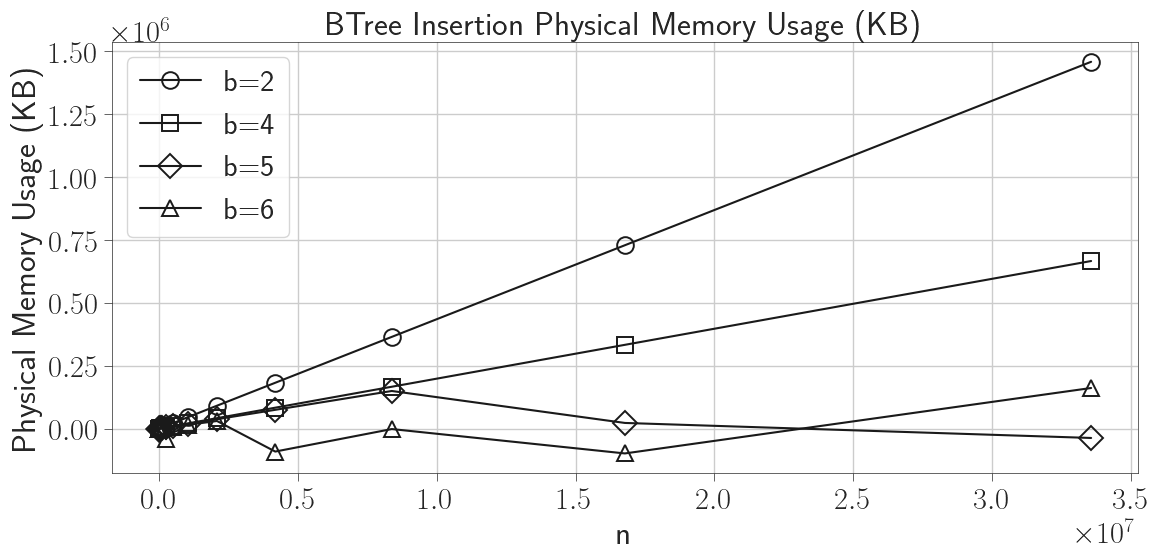

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)


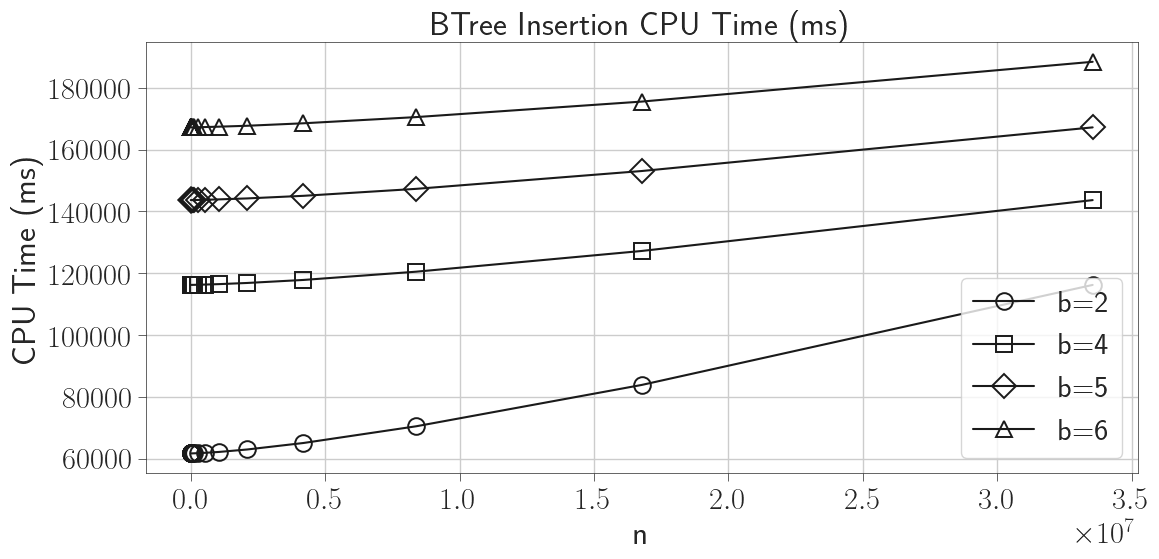

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]


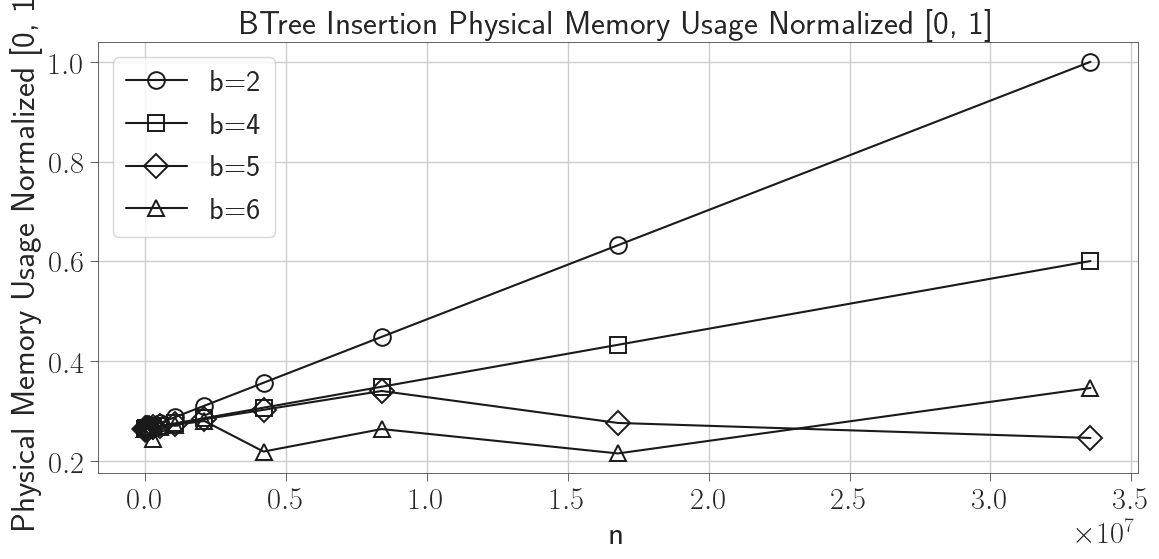

bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)


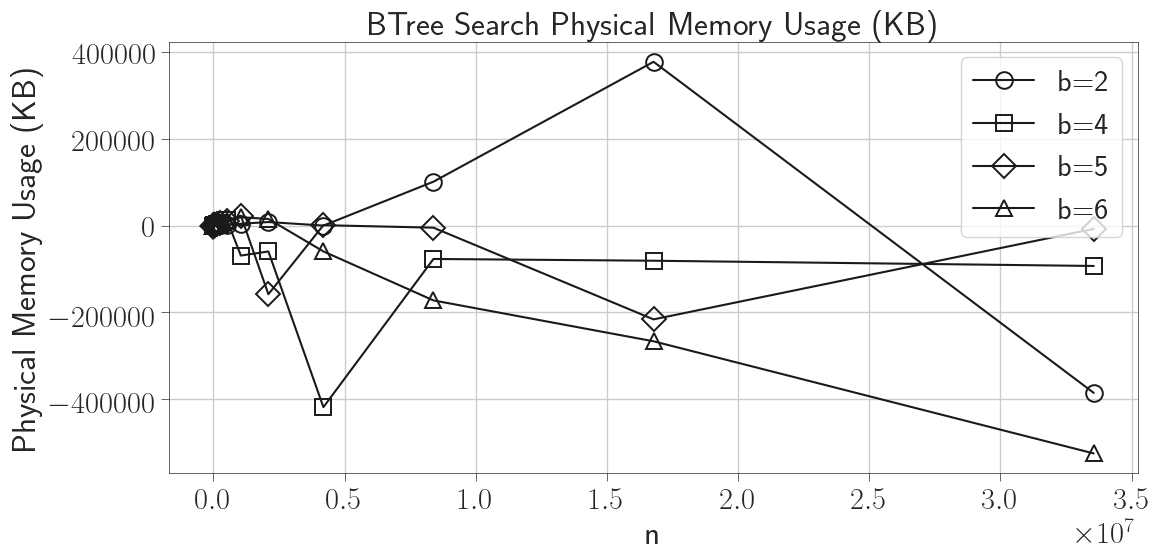

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)


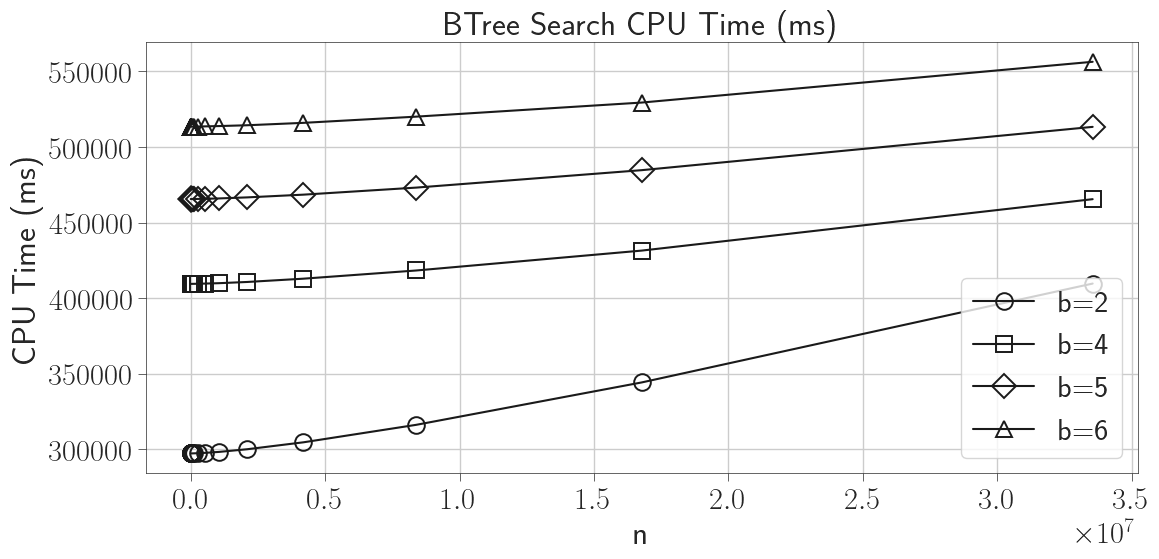

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]


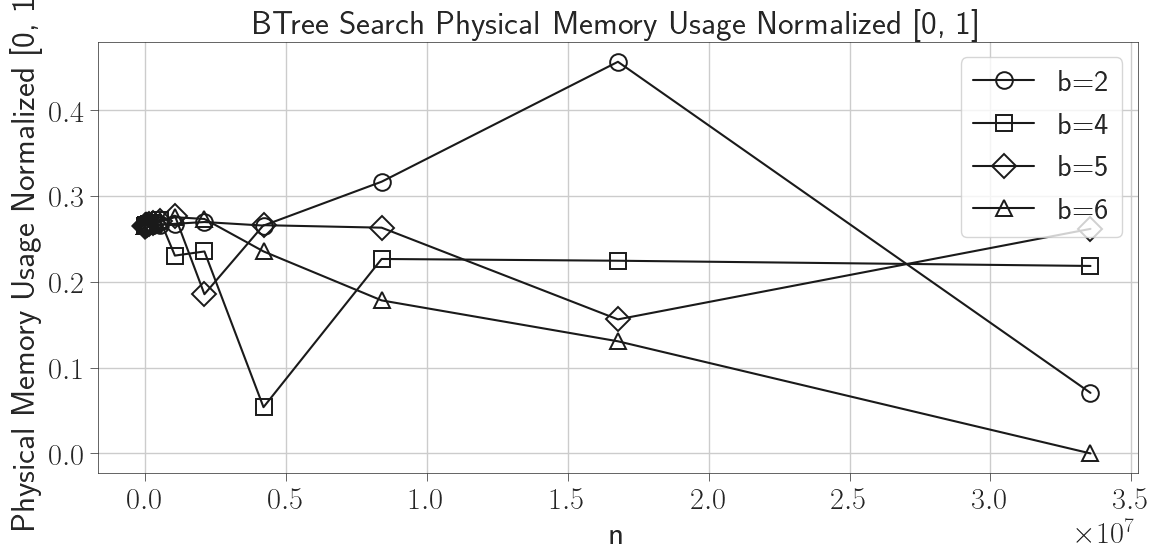

In [56]:
# Get unique names
# Columns to exclude from plotting
# Plot each unique name

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_filtered_btree_op = df_filtered_btree[df_filtered_btree['operation'] == op]
    df_filtered_map_op = df_filtered_map[df_filtered_map['operation'] == op]

    for column in df_filtered_btree.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(12, 6))

            marker_cyc = itertools.cycle(markers)

            for b in df_filtered_btree_op['b'].unique():
                print(f'bt {column}')
                sns.lineplot(
                    data=df_filtered_btree_op[df_filtered_btree_op['b'] == b],
                    x='n',
                    y=column,
                    marker=next(marker_cyc),
                    markerfacecolor='none',
                    markeredgecolor='k',
                    markeredgewidth=1.4,
                    markersize=12,
                    color='k',
                    linewidth=1.5,
                    label= f'b={int(b)}',
                    ax=ax
                )

            ax.set_title(f"BTree {op.title()} {column}")
            ax.set_xlabel('n')
            ax.set_ylabel(column)
            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)

            # plt.xticks(np.logspace(0, 2^20, num=12, base=2, dtype=int) )
            # ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

            plt.tight_layout()
            plt.savefig('plot/' +ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
            plt.show()

In [68]:
pd.set_option('display.max_rows', None)
btree_df

name  family_index  per_family_instance_index  \
0    OrderedMap             0                          0   
1    OrderedMap             0                          1   
2    OrderedMap             0                          2   
3    OrderedMap             0                          3   
4    OrderedMap             0                          4   
5    OrderedMap             0                          5   
6    OrderedMap             0                          6   
7    OrderedMap             0                          7   
8    OrderedMap             0                          8   
9    OrderedMap             0                          9   
10   OrderedMap             0                         10   
11   OrderedMap             0                         11   
12   OrderedMap             0                         12   
13   OrderedMap             0                         13   
14   OrderedMap             0                         14   
15   OrderedMap             0                         15   
16   OrderedMap             0                         16   
17   OrderedMap             0                         17   
18   OrderedMap             0                         18   
19   OrderedMap             0                         19   
20   OrderedMap             0                         20   
21   OrderedMap             0                         21   
22   OrderedMap             0                         22   
23     BTreeMap             1                          0   
24     BTreeMap             1                          1   
25     BTreeMap             1                          2   
26     BTreeMap             1                          3   
27     BTreeMap             1                          4   
28     BTreeMap             1                          5   
29     BTreeMap             1                          6   
30     BTreeMap             1                          7   
31     BTreeMap             1                          8   
32     BTreeMap             1                          9   
33     BTreeMap             1                         10   
34     BTreeMap             1                         11   
35     BTreeMap             1                         12   
36     BTreeMap             1                         13   
37     BTreeMap             1                         14   
38     BTreeMap             1                         15   
39     BTreeMap             1                         16   
40     BTreeMap             1                         17   
41     BTreeMap             1                         18   
42     BTreeMap             1                         19   
43     BTreeMap             1                         20   
44     BTreeMap             1                         21   
45     BTreeMap             1                         22   
46     BTreeMap             2                          0   
47     BTreeMap             2                          1   
48     BTreeMap             2                          2   
49     BTreeMap             2                          3   
50     BTreeMap             2                          4   
51     BTreeMap             2                          5   
52     BTreeMap             2                          6   
53     BTreeMap             2                          7   
54     BTreeMap             2                          8   
55     BTreeMap             2                          9   
56     BTreeMap             2                         10   
57     BTreeMap             2                         11   
58     BTreeMap             2                         12   
59     BTreeMap             2                         13   
60     BTreeMap             2                         14   
61     BTreeMap             2                         15   
62     BTreeMap             2                         16   
63     BTreeMap             2                         17   
64     BTreeMap             2                         18   
65     BTreeMap             2                      